**NETFLIX - DATA EXPLORATION AND VISUALIZATION**

Problem Statement:

Netflix stands as a global leader in the realm of OTT platforms, offering  access to movies and shows across languages to its subscribers. However, it is also a thriving business with substantial turnover. Therefore, it becomes imperative to analyze data comprehensively to forecast the content preferences of its audience. By deriving actionable insights, Netflix can effectively enhance its offerings and ensure continued growth in the competitive streaming landscape.

Importing the libraries :-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

Downloading the Netflix Dataset :-

In [ ]:
!gdown  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 49.5MB/s]


In [ ]:
#Reading the netflix dataset.
netflix_df = pd.read_csv("netflix.csv")
netflix_df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [ ]:
#deep copy of the dataset

df=netflix_df.copy()

Basis Analysis of the dataset ,datatypes and statistical information:-:-

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [ ]:
df.size

105684

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.values

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., '90 min',
        'Documentaries',
        'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
       ['s2', 'TV Show', 'Blood & Water', ..., '2 Seasons',
        'International TV Shows, TV Dramas, TV Mysteries',
        'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'],
       ['s3', 'TV Show', 'Ganglands', ..., '1 Season',
        'Crime TV Shows, International TV Shows, TV Action & Adventure',
        'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'],
       ...,
       ['s8805', 'Movie', 'Zombieland', ..., '88 min',
        'Comedies, Horror Movies',
        'Looking to survive in a world taken over by zombies, a dorky college st

In [ ]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
df["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [ ]:
df["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [ ]:
df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [ ]:
df["cast"].nunique()

7692

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
#Checking for Profile report to find out netflix dataset complete report
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Describe (gives statistical information of data)
df.describe(include="all")

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [ ]:
df.describe(include=object)

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [ ]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [ ]:
#checking for duplicates:-
df.duplicated().sum()

0

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Checking for uniqueness:-

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df["date_added"].head(1)

0    September 25, 2021
Name: date_added, dtype: object

In [ ]:
df["date_added"].tail(1)

8806    March 2, 2019
Name: date_added, dtype: object

**Checking for Missing Values ,Handling Null Values and Replacing the Null Values**

In [ ]:
#Checking for nullable columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Insight :- Observed the rows of the rating column contains duration values.

In [ ]:
df[df["duration"].isnull() == True]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

Insight:-Observed that there are 3 columns which were Null in duration column so fill the values of rating into this duration column where we have null values.

In [ ]:
df["duration"]=df["duration"].fillna(df["rating"])

In [ ]:
df[df["duration"].isna()==True]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df.iloc[[5541,5794,5813]]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

In [ ]:
df['rating'][[5541,5794,5813]]=np.nan

In [ ]:
#Checking the "Nan" values present in the rating column after updation.
df["rating"][[5541,5794,5813]]

5541    NaN
5794    NaN
5813    NaN
Name: rating, dtype: object

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Insight:Observed that there are no duration values present now.
Note:-Earlier Duration values present when we have taken value_counts

In [ ]:
#Again rechecking the null values presence in the columns:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
df['release_year'].nunique()

74

In [ ]:
df.rename({"listed_in": "genre"},axis=1,inplace=True)


**Replacing the Null values with "Unknown_columnname" for the following columns "Director,country,rating and cast" :**

In [ ]:
df["director"] = df["director"].fillna("Unknown_Director")
df['country']=df['country'].fillna('Unknown_Country')
df['rating']=df['rating'].fillna('Unknown_Rating')
df["cast"]=df["cast"].fillna("Unknown_Actor")


#Re- Checking Null Values

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
genre            0
description      0
dtype: int64

In [ ]:
df['date_added'] = df['date_added'].str.strip()
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [ ]:
df['date_added'].fillna(method='ffill', inplace=True)


In [ ]:
df["date_added"].value_counts()

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: count, Length: 1714, dtype: int64

In [ ]:
df["date_added"].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1714, dtype: datetime64[ns]

In [ ]:
df["date_added"].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genre         8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


#Checking Nested Columns in the dataframe:-
#First we need to check nested data columns(common separated values) for each and every column before un-nesting the columns:-

In [ ]:

df[df["show_id"].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

Insights:-There were no nested values for the column “show_id”

In [ ]:
df[df["type"].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

Insights:-There were no nested values for the column “type”

In [ ]:
df[df["title"].apply(lambda x: "," in str(x))]["title"].count()

138

In [ ]:
df[df["title"].apply(lambda x: "," in str(x))].head(2)

show_id     type                                title            director  \
10      s11  TV Show  Vendetta: Truth, Lies and The Mafia    Unknown_Director   
140    s141    Movie  El patrón, radiografía de un crimen  Sebastián Schindel   

                                                  cast               country  \
10                                       Unknown_Actor       Unknown_Country   
140  Joaquín Furriel, Luis Ziembrowski, Guillermo P...  Argentina, Venezuela   

    date_added  release_year rating  duration  \
10  2021-09-24          2021  TV-MA  1 Season   
140 2021-09-01          2014  TV-MA   100 min   

                                                 genre  \
10   Crime TV Shows, Docuseries, International TV S...   
140            Dramas, International Movies, Thrillers   

                                           description  
10   Sicily boasts a bold "Anti-Mafia" coalition. B...  
140  A lawyer defends an illiterate man whose explo...

Insights :-
•	Total 138 rows were there but observed that these are unique movie names/tv shows
•	comma given in the title column is , continuation of the title of the movie/tv_show..so no need to unnest this column


In [ ]:
df[df["director"].apply(lambda x: "," in str(x))].head(3)

show_id   type                                              title  \
6       s7  Movie                   My Little Pony: A New Generation   
16     s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
23     s24  Movie       Go! Go! Cory Carson: Chrissy Takes the Wheel   

                                         director  \
6                   Robert Cullen, José Luis Ucha   
16  Pedro de Echave García, Pablo Azorín Williams   
23                        Alex Woo, Stanley Moore   

                                                 cast          country  \
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  Unknown_Country   
16                                      Unknown_Actor  Unknown_Country   
23  Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...  Unknown_Country   

   date_added  release_year rating duration  \
6  2021-09-24          2021     PG   91 min   
16 2021-09-22          2020  TV-MA   67 min   
23 2021-09-21          2021   TV-Y   61 min   

                                  genre  \
6              Children & Family Movies   
16  Documentaries, International Movies   
23             Children & Family Movies   

                                          description  
6   Equestria's divided. But a bright-eyed hero be...  
16  Declassified documents reveal the post-WWII li...  
23  From arcade games to sled days and hiccup cure...

In [ ]:
df[df["director"].apply(lambda x: "," in str(x))].count()

show_id         614
type            614
title           614
director        614
cast            614
country         614
date_added      614
release_year    614
rating          614
duration        614
genre           614
description     614
dtype: int64

Insights :-Observed that there were 614 rows present which needs to be unnest(director column).

In [ ]:
df[df["cast"].apply(lambda x: "," in str(x))].head(3)

show_id     type          title          director  \
1      s2  TV Show  Blood & Water  Unknown_Director   
2      s3  TV Show      Ganglands   Julien Leclercq   
4      s5  TV Show   Kota Factory  Unknown_Director   

                                                cast          country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            India   

  date_added  release_year rating   duration  \
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                               genre  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
4  In a city of coaching centers known to train I...

In [ ]:
df[df["cast"].apply(lambda x: "," in str(x))].count()

show_id         7101
type            7101
title           7101
director        7101
cast            7101
country         7101
date_added      7101
release_year    7101
rating          7101
duration        7101
genre           7101
description     7101
dtype: int64

Insights :-Observed that there were 7101 rows present which needs to be unnest(cast column).

In [ ]:
df[df["country"].apply(lambda x: "," in str(x))].head(3)

show_id   type         title             director  \
7       s8  Movie       Sankofa         Haile Gerima   
12     s13  Movie  Je Suis Karl  Christian Schwochow   
29     s30  Movie      Paranoia       Robert Luketic   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
29  Liam Hemsworth, Gary Oldman, Amber Heard, Harr...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
29                       United States, India, France 2021-09-19   

    release_year rating duration  \
7           1993  TV-MA  125 min   
12          2021  TV-MA  127 min   
29          2013  PG-13  106 min   

                                               genre  \
7   Dramas, Independent Movies, International Movies   
12                      Dramas, International Movies   
29                                         Thrillers   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
12  After most of her family is murdered in a terr...  
29  Blackmailed by his company's CEO, a low-level ...

In [ ]:
df[df["country"].apply(lambda x: "," in str(x))].count()

show_id         1320
type            1320
title           1320
director        1320
cast            1320
country         1320
date_added      1320
release_year    1320
rating          1320
duration        1320
genre           1320
description     1320
dtype: int64

Insights :- Observed that there were 1320 rows present which needs to be unnest (country column)

In [ ]:
df[df["date_added"].apply(lambda x: "," in str(x))]["date_added"].count()

0

In [ ]:
df[df["date_added"].apply(lambda x: "," in str(x))].head(3)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

In [ ]:
df[df["release_year"].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

In [ ]:
df[df["rating"].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

In [ ]:
df[df["duration"].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, genre, description]
Index: []

In [ ]:
df[df["genre"].apply(lambda x: "," in str(x))].head(3)

show_id     type                  title          director  \
1      s2  TV Show          Blood & Water  Unknown_Director   
2      s3  TV Show              Ganglands   Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Unknown_Director   

                                                cast          country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   
3                                      Unknown_Actor  Unknown_Country   

  date_added  release_year rating   duration  \
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   

                                               genre  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   

                                         description  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...

Insights:-
Observed the nested columns “director”,”cast”,”country”,”genre” i.e comma separated values which were present .so we need to clean this data.
If we are keeping the data as is , it is tough to analyze the data.

Recommendations:-
Need to be unnest the columns mentioned in the above “Insights section”.
For cleaning we need to go for data cleansing process .

In [ ]:
df[df["description"].apply(lambda x: "," in str(x))].head(5)

show_id     type                  title          director  \
0      s1    Movie   Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show          Blood & Water  Unknown_Director   
2      s3  TV Show              Ganglands   Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Unknown_Director   
4      s5  TV Show           Kota Factory  Unknown_Director   

                                                cast          country  \
0                                      Unknown_Actor    United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   
3                                      Unknown_Actor  Unknown_Country   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                               genre  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df.rename({"listed_in": "genre"},axis=1,inplace=True)
df.head(2)

show_id     type                 title          director  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show         Blood & Water  Unknown_Director   

                                                cast        country  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genre         8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Un-nesting the columns  :- [director,cast,country,genre]

Note:- Columns those have cell values with multiple comma separated values ,those we are unnesting into multiple rows.


In [ ]:
director_df=df[['title','director']]
director_df["unnested_director"]=director_df['director'].apply(lambda x: str(x).split(", "))
director_df=director_df.explode("unnested_director")
director_df.head()

title          director unnested_director
0   Dick Johnson Is Dead   Kirsten Johnson   Kirsten Johnson
1          Blood & Water  Unknown_Director  Unknown_Director
2              Ganglands   Julien Leclercq   Julien Leclercq
3  Jailbirds New Orleans  Unknown_Director  Unknown_Director
4           Kota Factory  Unknown_Director  Unknown_Director

In [ ]:
director_df.shape

(9612, 3)

In [ ]:
cast_df=df[["title","cast"]]
cast_df["unnested_cast"]=cast_df['cast'].apply(lambda x: str(x).split(", "))
cast_df=cast_df.explode("unnested_cast")
cast_df.head()

title                                               cast  \
0  Dick Johnson Is Dead                                      Unknown_Actor   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   

    unnested_cast  
0   Unknown_Actor  
1      Ama Qamata  
1     Khosi Ngema  
1   Gail Mabalane  
1  Thabang Molaba

In [ ]:
cast_df.shape

(64951, 3)

In [ ]:
country_df=df[['title','country']]
country_df["unnested_country"]=country_df['country'].apply(lambda x : str(x).split(", "))
country_df=country_df.explode("unnested_country")
country_df.head()

title          country unnested_country
0   Dick Johnson Is Dead    United States    United States
1          Blood & Water     South Africa     South Africa
2              Ganglands  Unknown_Country  Unknown_Country
3  Jailbirds New Orleans  Unknown_Country  Unknown_Country
4           Kota Factory            India            India

In [ ]:
country_df.shape

(10845, 3)

In [ ]:
genre_df=df[['title','genre']]
genre_df["unnested_genre"]=genre_df["genre"].apply(lambda x:str(x).split(", "))
genre_df=genre_df.explode("unnested_genre")
genre_df.head()

title                                              genre  \
0  Dick Johnson Is Dead                                      Documentaries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
2             Ganglands  Crime TV Shows, International TV Shows, TV Act...   

           unnested_genre  
0           Documentaries  
1  International TV Shows  
1               TV Dramas  
1            TV Mysteries  
2          Crime TV Shows

In [ ]:
genre_df.shape

(19323, 3)

**Merging all the above 4 dataframes which are created newly :-**

In [ ]:

df_new = pd.merge(left=df,right=director_df,on ="title",how="left")

In [ ]:
df_new.head(2)

show_id     type                 title        director_x  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show         Blood & Water  Unknown_Director   

                                                cast        country  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:
df_new = pd.merge(right=df_new,left=cast_df,on="title",how="left")

In [ ]:
df_new.head(2)

title                                             cast_x  \
0  Dick Johnson Is Dead                                      Unknown_Actor   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   

   unnested_cast show_id     type        director_x  \
0  Unknown_Actor      s1    Movie   Kirsten Johnson   
1     Ama Qamata      s2  TV Show  Unknown_Director   

                                              cast_y        country  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:
df_new=pd.merge(right=df_new,left=country_df,on="title",how="left")

In [ ]:
df_new.head(2)

title      country_x unnested_country  \
0  Dick Johnson Is Dead  United States    United States   
1         Blood & Water   South Africa     South Africa   

                                              cast_x  unnested_cast show_id  \
0                                      Unknown_Actor  Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Ama Qamata      s2   

      type        director_x  \
0    Movie   Kirsten Johnson   
1  TV Show  Unknown_Director   

                                              cast_y      country_y  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:
df_new.shape

(89382, 18)

In [ ]:
df_new=pd.merge(right=df_new,left=genre_df,on="title",how="left")

In [ ]:
df_new.head(2)

title                                          genre_x  \
0  Dick Johnson Is Dead                                    Documentaries   
1         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   

           unnested_genre      country_x unnested_country  \
0           Documentaries  United States    United States   
1  International TV Shows   South Africa     South Africa   

                                              cast_x  unnested_cast show_id  \
0                                      Unknown_Actor  Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Ama Qamata      s2   

      type        director_x  \
0    Movie   Kirsten Johnson   
1  TV Show  Unknown_Director   

                                              cast_y      country_y  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                           genre_y  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:

#After merging all of the 4 DF's :
df_new.shape

(201991, 20)

In [ ]:
df_new.head()

title                                          genre_x  \
0  Dick Johnson Is Dead                                    Documentaries   
1         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
2         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
3         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
4         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   

           unnested_genre      country_x unnested_country  \
0           Documentaries  United States    United States   
1  International TV Shows   South Africa     South Africa   
2  International TV Shows   South Africa     South Africa   
3  International TV Shows   South Africa     South Africa   
4  International TV Shows   South Africa     South Africa   

                                              cast_x   unnested_cast show_id  \
0                                      Unknown_Actor   Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...      Ama Qamata      s2   
2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Khosi Ngema      s2   
3  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   Gail Mabalane      s2   
4  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  Thabang Molaba      s2   

      type        director_x  \
0    Movie   Kirsten Johnson   
1  TV Show  Unknown_Director   
2  TV Show  Unknown_Director   
3  TV Show  Unknown_Director   
4  TV Show  Unknown_Director   

                                              cast_y      country_y  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
3  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
4  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA  2 Seasons   
3 2021-09-24          2021  TV-MA  2 Seasons   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           genre_y  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
2  International TV Shows, TV Dramas, TV Mysteries   
3  International TV Shows, TV Dramas, TV Mysteries   
4  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   
2  After crossing paths at a party, a Cape Town t...  Unknown_Director   
3  After crossing paths at a party, a Cape Town t...  Unknown_Director   
4  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director  
2  Unknown_Director  
3  Unknown_Director  
4  Unknown_Director

In [ ]:
df_new.columns

Index(['title', 'genre_x', 'unnested_genre', 'country_x', 'unnested_country',
       'cast_x', 'unnested_cast', 'show_id', 'type', 'director_x', 'cast_y',
       'country_y', 'date_added', 'release_year', 'rating', 'duration',
       'genre_y', 'description', 'director_y', 'unnested_director'],
      dtype='object')

In [ ]:
df_new1=df_new.copy()

In [ ]:
df_new1.drop(columns=["genre_x","country_x","cast_x","director_x","cast_y","country_y","genre_y","director_y"],inplace=True)

In [ ]:
df_new1.shape

(201991, 12)

In [ ]:
df_new1.columns

Index(['title', 'unnested_genre', 'unnested_country', 'unnested_cast',
       'show_id', 'type', 'date_added', 'release_year', 'rating', 'duration',
       'description', 'unnested_director'],
      dtype='object')

In [ ]:
df_new1.head()

title          unnested_genre unnested_country  \
0  Dick Johnson Is Dead           Documentaries    United States   
1         Blood & Water  International TV Shows     South Africa   
2         Blood & Water  International TV Shows     South Africa   
3         Blood & Water  International TV Shows     South Africa   
4         Blood & Water  International TV Shows     South Africa   

    unnested_cast show_id     type date_added  release_year rating   duration  \
0   Unknown_Actor      s1    Movie 2021-09-25          2020  PG-13     90 min   
1      Ama Qamata      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
2     Khosi Ngema      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
3   Gail Mabalane      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
4  Thabang Molaba      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   

                                         description unnested_director  
0  As her father nears the end of his life, filmm...   Kirsten Johnson  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director  
2  After crossing paths at a party, a Cape Town t...  Unknown_Director  
3  After crossing paths at a party, a Cape Town t...  Unknown_Director  
4  After crossing paths at a party, a Cape Town t...  Unknown_Director

In [ ]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              201991 non-null  object        
 1   unnested_genre     201991 non-null  object        
 2   unnested_country   201991 non-null  object        
 3   unnested_cast      201991 non-null  object        
 4   show_id            201991 non-null  object        
 5   type               201991 non-null  object        
 6   date_added         201991 non-null  datetime64[ns]
 7   release_year       201991 non-null  int64         
 8   rating             201991 non-null  object        
 9   duration           201991 non-null  object        
 10  description        201991 non-null  object        
 11  unnested_director  201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [ ]:
df_new1.duplicated().sum()

55

In [ ]:
df_new1.drop_duplicates(keep="first",inplace=True)

In [ ]:
df_new1.shape

(201936, 12)

In [ ]:
N_df1=df_new1.copy()

In [ ]:
N_df1.shape

(201936, 12)

In [ ]:
N_df1.head(2)

title          unnested_genre unnested_country  \
0  Dick Johnson Is Dead           Documentaries    United States   
1         Blood & Water  International TV Shows     South Africa   

   unnested_cast show_id     type date_added  release_year rating   duration  \
0  Unknown_Actor      s1    Movie 2021-09-25          2020  PG-13     90 min   
1     Ama Qamata      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   

                                         description unnested_director  
0  As her father nears the end of his life, filmm...   Kirsten Johnson  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director

In [ ]:
N_df1.rename({"unnested_genre":"genre", "unnested_country" :"country","unnested_cast":"cast","unnested_director" : "director" },axis=1,inplace=True)

In [ ]:
N_df1.head(2)

title                   genre        country           cast  \
0  Dick Johnson Is Dead           Documentaries  United States  Unknown_Actor   
1         Blood & Water  International TV Shows   South Africa     Ama Qamata   

  show_id     type date_added  release_year rating   duration  \
0      s1    Movie 2021-09-25          2020  PG-13     90 min   
1      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   

                                         description          director  
0  As her father nears the end of his life, filmm...   Kirsten Johnson  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director

In [ ]:
N_df1.shape

(201936, 12)

In [ ]:
N_df1.isnull().sum()

title           0
genre           0
country         0
cast            0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
dtype: int64

In [ ]:
N_df1[N_df1["date_added"].isnull()==True]


Empty DataFrame
Columns: [title, genre, country, cast, show_id, type, date_added, release_year, rating, duration, description, director]
Index: []

In [ ]:
N_df1["date_added"].value_counts()

date_added
2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1911
2021-09-01    1756
              ... 
2016-05-06       1
2015-12-18       1
2017-05-31       1
2020-05-26       1
2021-09-25       1
Name: count, Length: 1714, dtype: int64

In [ ]:
N_df1["date_added"].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1714, dtype: datetime64[ns]

In [ ]:
N_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201936 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         201936 non-null  object        
 1   genre         201936 non-null  object        
 2   country       201936 non-null  object        
 3   cast          201936 non-null  object        
 4   show_id       201936 non-null  object        
 5   type          201936 non-null  object        
 6   date_added    201936 non-null  datetime64[ns]
 7   release_year  201936 non-null  int64         
 8   rating        201936 non-null  object        
 9   duration      201936 non-null  object        
 10  description   201936 non-null  object        
 11  director      201936 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


In [ ]:
N_df1["day_name_added"]=N_df1["date_added"].dt.day_name()
N_df1["month_added"]=N_df1["date_added"].dt.month
N_df1["year_added"]=N_df1["date_added"].dt.year
N_df1["week_added"]=N_df1["date_added"].dt.isocalendar().week
N_df1["day_added"]=N_df1["date_added"].dt.day
N_df1.head()


title                   genre        country  \
0  Dick Johnson Is Dead           Documentaries  United States   
1         Blood & Water  International TV Shows   South Africa   
2         Blood & Water  International TV Shows   South Africa   
3         Blood & Water  International TV Shows   South Africa   
4         Blood & Water  International TV Shows   South Africa   

             cast show_id     type date_added  release_year rating   duration  \
0   Unknown_Actor      s1    Movie 2021-09-25          2020  PG-13     90 min   
1      Ama Qamata      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
2     Khosi Ngema      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
3   Gail Mabalane      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
4  Thabang Molaba      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   

                                         description          director  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   
2  After crossing paths at a party, a Cape Town t...  Unknown_Director   
3  After crossing paths at a party, a Cape Town t...  Unknown_Director   
4  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  day_name_added  month_added  year_added  week_added  day_added  
0       Saturday            9        2021          38         25  
1         Friday            9        2021          38         24  
2         Friday            9        2021          38         24  
3         Friday            9        2021          38         24  
4         Friday            9        2021          38         24

In [ ]:
N_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201936 entries, 0 to 201990
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           201936 non-null  object        
 1   genre           201936 non-null  object        
 2   country         201936 non-null  object        
 3   cast            201936 non-null  object        
 4   show_id         201936 non-null  object        
 5   type            201936 non-null  object        
 6   date_added      201936 non-null  datetime64[ns]
 7   release_year    201936 non-null  int64         
 8   rating          201936 non-null  object        
 9   duration        201936 non-null  object        
 10  description     201936 non-null  object        
 11  director        201936 non-null  object        
 12  day_name_added  201936 non-null  object        
 13  month_added     201936 non-null  int32         
 14  year_added      201936 non-null  int32   

In [ ]:
N_df1.isnull().sum()

title             0
genre             0
country           0
cast              0
show_id           0
type              0
date_added        0
release_year      0
rating            0
duration          0
description       0
director          0
day_name_added    0
month_added       0
year_added        0
week_added        0
day_added         0
dtype: int64

#1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

# a. For Non-Graphical Analysis :- Taking counts for each categorical variable

In [ ]:
#Categorical variables are "Type" and "rating" :

N_df1["type"].value_counts()

type
Movie      145788
TV Show     56148
Name: count, dtype: int64

In [ ]:
N_df1["rating"].value_counts()

rating
TV-MA             73819
TV-14             43925
R                 25859
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown_Rating       70
Name: count, dtype: int64

# b. For graphical analysis:
# Analysis at "type" individually -  Univariate Analysis                  

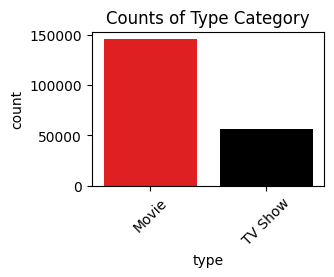

In [ ]:
# For "type" category:-
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(3,2))
sns.countplot(x="type",data=N_df1,hue='type',palette=color_palette)
plt.xticks(rotation = 45)
plt.title("Counts of Type Category")
plt.show()



Insight : Observed that more number of movies were added than TV shows into the Netflix.

In [ ]:
N_df1['rating'].value_counts().index

Index(['TV-MA', 'TV-14', 'R', 'PG-13', 'TV-PG', 'PG', 'TV-Y7', 'TV-Y', 'TV-G',
       'NR', 'G', 'NC-17', 'TV-Y7-FV', 'UR', 'Unknown_Rating'],
      dtype='object', name='rating')

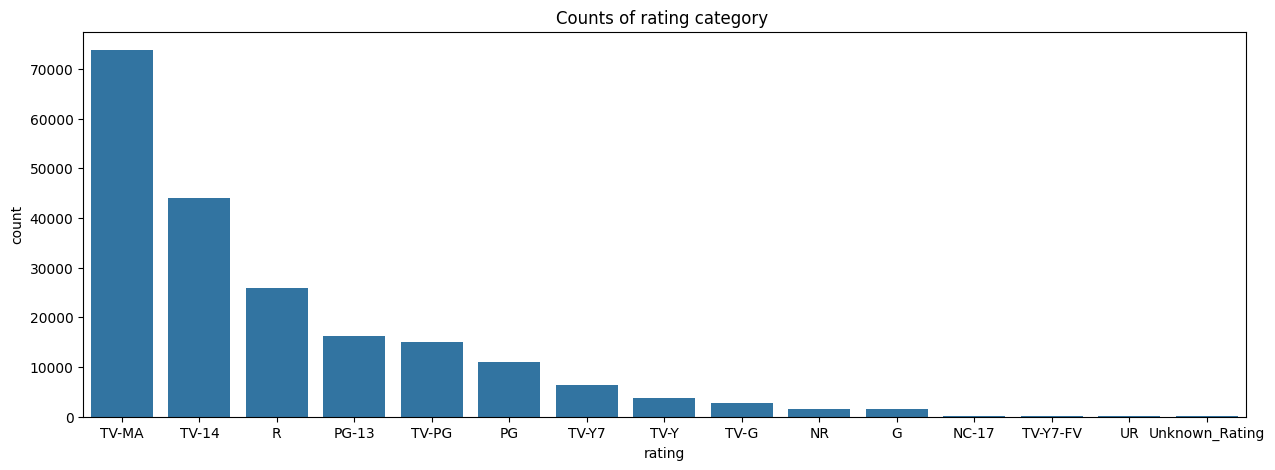

In [ ]:
#For column "Rating" Category:-
colour_palette = {"Movie":"red","TV Show":"black"}
plt.figure(figsize=(15,5))
sns.countplot(x="rating",data=N_df1,order=N_df1['rating'].value_counts().index)
plt.title("Counts of rating category ")
plt.show()

#Type vs Rating categories:-

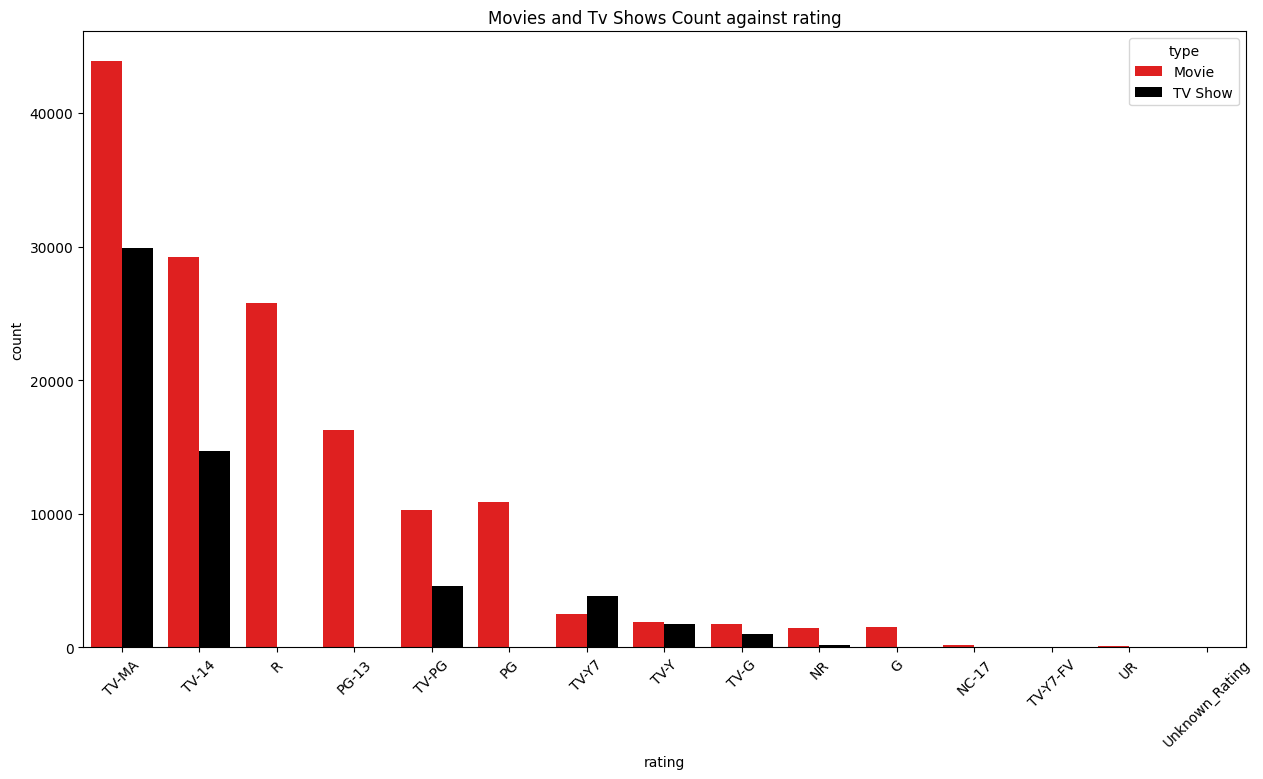

In [ ]:
color_palette = {"Movie": "red","TV Show" :"black"}
plt.figure(figsize=(15,8))
sns.countplot(data=N_df1,hue="type",palette=color_palette,x="rating",order=N_df1["rating"].value_counts().index)
plt.xticks(rotation = 45)
plt.title("Movies and Tv Shows Count against rating")
plt.show()

Insights:-

1.Observed that TV-MA rating of the movies is very high than Tv show rating.

2.TV-MA rating is for only Adults and also intended to unsuitable for children below 18 years.

3.TV-14-Not suitable for the children those who have under 14.

4.The countplot shows that the majority of ratings are in the categories of TV-MA and TV-14.

5.By comparing the heights of the bars within each rating category, we can observe the relative frequency of each rating for movies and TV shows.

6.The color palette effectively distinguishes between movies (red) and TV shows (black), making it easy to differentiate between the two types of content.


# 2 . Comparison of tv shows vs. movies.

# a. Find the number of movies produced in each country and pick the top 10 countries.



Creating new table for Movies and TV Show

In [ ]:
Movies = N_df1[N_df1["type"]=="Movie"]
Movies.head()

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   
160  My Little Pony: A New Generation  Children & Family Movies   
161  My Little Pony: A New Generation  Children & Family Movies   
162  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type date_added  release_year  \
0      United States    Unknown_Actor      s1  Movie 2021-09-25          2020   
159  Unknown_Country  Vanessa Hudgens      s7  Movie 2021-09-24          2021   
160  Unknown_Country  Vanessa Hudgens      s7  Movie 2021-09-24          2021   
161  Unknown_Country     Kimiko Glenn      s7  Movie 2021-09-24          2021   
162  Unknown_Country     Kimiko Glenn      s7  Movie 2021-09-24          2021   

    rating duration                                        description  \
0    PG-13   90 min  As her father nears the end of his life, filmm...   
159     PG   91 min  Equestria's divided. But a bright-eyed hero be...   
160     PG   91 min  Equestria's divided. But a bright-eyed hero be...   
161     PG   91 min  Equestria's divided. But a bright-eyed hero be...   
162     PG   91 min  Equestria's divided. But a bright-eyed hero be...   

            director day_name_added  month_added  year_added  week_added  \
0    Kirsten Johnson       Saturday            9        2021          38   
159    Robert Cullen         Friday            9        2021          38   
160   José Luis Ucha         Friday            9        2021          38   
161    Robert Cullen         Friday            9        2021          38   
162   José Luis Ucha         Friday            9        2021          38   

     day_added  
0           25  
159         24  
160         24  
161         24  
162         24

In [ ]:
Movies.shape

(145788, 17)

In [ ]:
Movies.duplicated().sum()

0

In [ ]:
TV_Show =N_df1[N_df1["type"]=="TV Show"]
TV_Show.head()

title                   genre       country              cast  \
1  Blood & Water  International TV Shows  South Africa        Ama Qamata   
2  Blood & Water  International TV Shows  South Africa       Khosi Ngema   
3  Blood & Water  International TV Shows  South Africa     Gail Mabalane   
4  Blood & Water  International TV Shows  South Africa    Thabang Molaba   
5  Blood & Water  International TV Shows  South Africa  Dillon Windvogel   

  show_id     type date_added  release_year rating   duration  \
1      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
2      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
3      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
4      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   
5      s2  TV Show 2021-09-24          2021  TV-MA  2 Seasons   

                                         description          director  \
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   
2  After crossing paths at a party, a Cape Town t...  Unknown_Director   
3  After crossing paths at a party, a Cape Town t...  Unknown_Director   
4  After crossing paths at a party, a Cape Town t...  Unknown_Director   
5  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  day_name_added  month_added  year_added  week_added  day_added  
1         Friday            9        2021          38         24  
2         Friday            9        2021          38         24  
3         Friday            9        2021          38         24  
4         Friday            9        2021          38         24  
5         Friday            9        2021          38         24

In [ ]:
TV_Show.shape

(56148, 17)

In [ ]:
TV_Show.duplicated().sum()

0

In [ ]:
Movies.head(2)

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type date_added  release_year  \
0      United States    Unknown_Actor      s1  Movie 2021-09-25          2020   
159  Unknown_Country  Vanessa Hudgens      s7  Movie 2021-09-24          2021   

    rating duration                                        description  \
0    PG-13   90 min  As her father nears the end of his life, filmm...   
159     PG   91 min  Equestria's divided. But a bright-eyed hero be...   

            director day_name_added  month_added  year_added  week_added  \
0    Kirsten Johnson       Saturday            9        2021          38   
159    Robert Cullen         Friday            9        2021          38   

     day_added  
0           25  
159         24

In [ ]:
# Group the data by country and count the number of movies
movie_count_by_country=Movies.groupby("country")["title"].nunique().to_frame(name="count").reset_index()
# Sort the data by count in descending order and select the top 10 countries
top_10_countries = movie_count_by_country.sort_values(by="count", ascending=False).head(10)
# Print the results
print(top_10_countries)


             country  count
114    United States   2751
43             India    962
112   United Kingdom    532
116  Unknown_Country    440
20            Canada    319
34            France    303
36           Germany    182
100            Spain    171
51             Japan    119
23             China    114


#2. b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

Applying group by each country and finding the count of unique
titles of Tv-shows

______________________________________________________________________________

In [ ]:
# Group the data by country and count the number of TV shows
tv_show_count_by_country = TV_Show.groupby("country")["title"].nunique().to_frame(name="count").reset_index()

# Sort the data by count in descending order and select the top 10 countries
top_10_countries_tv = tv_show_count_by_country.sort_values(by="count", ascending=False).head(10)

# Print the results
print(top_10_countries_tv)


            country  count
63    United States    938
64  Unknown_Country    391
62   United Kingdom    272
30            Japan    199
52      South Korea    170
8            Canada    126
19           France     90
25            India     84
57           Taiwan     70
2         Australia     66


In [ ]:
#Comparision between movies and tv_shows
Merge_Compare_Movies_Tv_shows =pd.merge(left=top_10_countries,right=top_10_countries_tv,on="country",how="inner")
Merge_Compare_Movies_Tv_shows.sort_values(by=["count_x","count_y"],ascending = [False,False])
Merge_Compare_Movies_Tv_shows

country  count_x  count_y
0    United States     2751      938
1            India      962       84
2   United Kingdom      532      272
3  Unknown_Country      440      391
4           Canada      319      126
5           France      303       90
6            Japan      119      199

In [ ]:
Merge_Compare_Movies_Tv_shows.rename(columns={"count_x":"Movies_Count","count_y":"Tv_Shows_Count"},inplace=True)
Merge_Compare_Movies_Tv_shows

country  Movies_Count  Tv_Shows_Count
0    United States          2751             938
1            India           962              84
2   United Kingdom           532             272
3  Unknown_Country           440             391
4           Canada           319             126
5           France           303              90
6            Japan           119             199

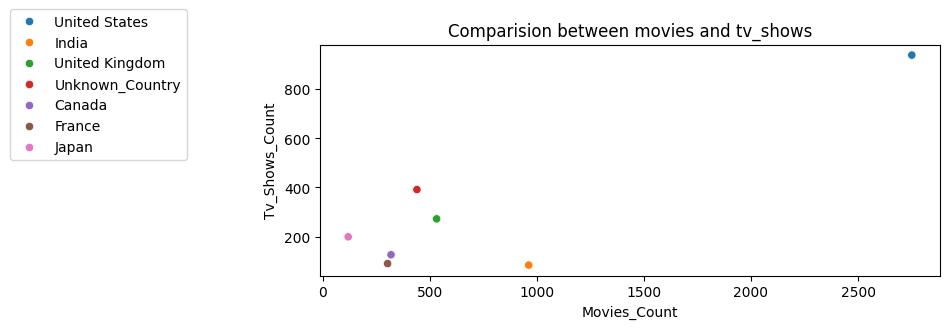

In [ ]:
#Draw the scatter plot of Merge_Compare_Movies_Tv_shows
plt.figure(figsize=(8,3))
sns.scatterplot(data= Merge_Compare_Movies_Tv_shows,x="Movies_Count",y="Tv_Shows_Count",hue="country")
plt.title("Comparision between movies and tv_shows")
plt.legend(loc=(-0.5,.5))
plt.show()

# Distribution of movies and TV_show

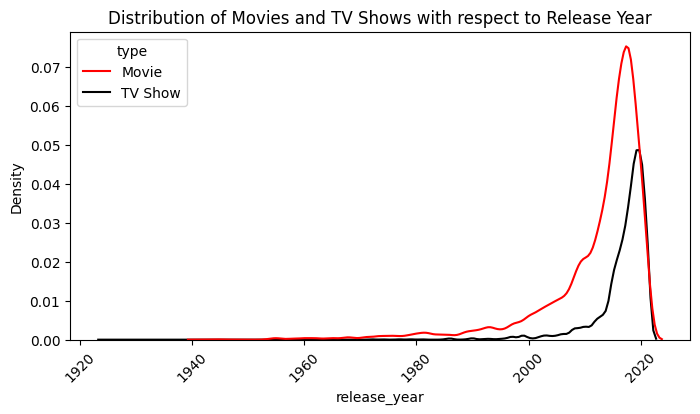

In [ ]:
plt.figure(figsize=(8,4))
movie_TV_shows=sns.kdeplot(data=N_df1,x='release_year',hue='type',palette=color_palette)
plt.xticks(rotation = 45)
plt.title('Distribution of Movies and TV Shows with respect to Release Year')
plt.show()

Insights:-

Movies are increasing approximately from the year 2008.
TV_shows are increasing approximately from the year 2012.

In [ ]:
N_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201936 entries, 0 to 201990
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           201936 non-null  object        
 1   genre           201936 non-null  object        
 2   country         201936 non-null  object        
 3   cast            201936 non-null  object        
 4   show_id         201936 non-null  object        
 5   type            201936 non-null  object        
 6   date_added      201936 non-null  datetime64[ns]
 7   release_year    201936 non-null  int64         
 8   rating          201936 non-null  object        
 9   duration        201936 non-null  object        
 10  description     201936 non-null  object        
 11  director        201936 non-null  object        
 12  day_name_added  201936 non-null  object        
 13  month_added     201936 non-null  int32         
 14  year_added      201936 non-null  int32   

In [ ]:
N_df1.isnull().sum()

title             0
genre             0
country           0
cast              0
show_id           0
type              0
date_added        0
release_year      0
rating            0
duration          0
description       0
director          0
day_name_added    0
month_added       0
year_added        0
week_added        0
day_added         0
dtype: int64

In [ ]:
N_df1.groupby('country')['title'].value_counts()

country       title                           
              Eyes of a Thief                     24
              D.P.                                 8
Afghanistan   The Land of the Enlightened          2
Albania       Forgive Us Our Debts                 8
Algeria       Alexandria ... Why?                 33
                                                  ..
West Germany  Monty Python's Fliegender Zirkus    12
              Hitler - A Career                    4
Zimbabwe      Cook Off                            36
              Trophy                               4
              Democrats                            2
Name: count, Length: 10845, dtype: int64

In [ ]:
N_df1.groupby('country')['genre'].value_counts()

country       genre                 
              International Movies       8
              Dramas                     8
              Independent Movies         8
              International TV Shows     4
              TV Dramas                  4
                                        ..
West Germany  Documentaries              2
Zimbabwe      International Movies      15
              Comedies                  12
              Romantic Movies           12
              Documentaries              3
Name: count, Length: 1464, dtype: int64


# Type of content is available in different countries:

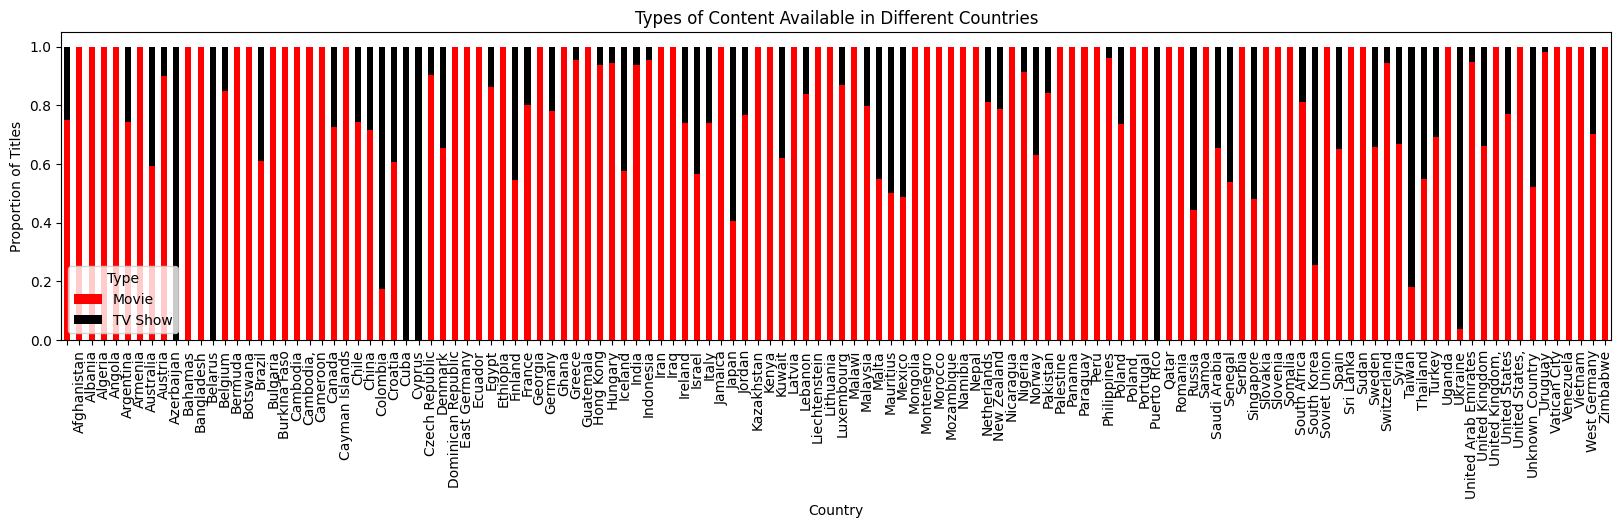

In [ ]:
# Group by country and count the number of movies and TV shows
content_by_country = N_df1.groupby(['country', 'type']).size().unstack(fill_value=0)

# Normalize the data (calculate proportions)
content_by_country['Total'] = content_by_country['Movie'] + content_by_country['TV Show']
content_by_country['Movie'] /= content_by_country['Total']
content_by_country['TV Show'] /= content_by_country['Total']

# Plot the stacked bar chart
color_palette={'Movie':'red','TV Show':'black'}
content_by_country[['Movie', 'TV Show']].plot(kind='bar', stacked=True, figsize=(20, 4),color=color_palette)
plt.title('Types of Content Available in Different Countries')
plt.xlabel('Country')
plt.ylabel('Proportion of Titles')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

Insights : - Each bar represents a country, with the proportion of movies and TV shows stacked within each bar.

This plot illustrates the distribution of movie and TV show content across different countries.

In [ ]:
content_by_country = N_df1.groupby(['country', 'type']).size().unstack(fill_value=0).reset_index()
content_by_country

type       country  Movie  TV Show
0                      24        8
1      Afghanistan      2        0
2          Albania      8        0
3          Algeria     77        0
4           Angola     32        0
..             ...    ...      ...
123   Vatican City      3        0
124      Venezuela     28        0
125        Vietnam    134        0
126   West Germany     64       27
127       Zimbabwe     42        0

[128 rows x 3 columns]

In [ ]:
genre_by_country = N_df1.groupby(['country', 'genre']).size().unstack(fill_value=0).reset_index()
genre_by_country

genre       country  Action & Adventure  Anime Features  Anime Series  \
0                                     0               0             0   
1       Afghanistan                   0               0             0   
2           Albania                   0               0             0   
3           Algeria                   0               0             0   
4            Angola                  16               0             0   
..              ...                 ...             ...           ...   
123    Vatican City                   0               0             0   
124       Venezuela                   0               0             0   
125         Vietnam                  11               0             0   
126    West Germany                   0               0             0   
127        Zimbabwe                   0               0             0   

genre  British TV Shows  Children & Family Movies  Classic & Cult TV  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
4                     0                         0                  0   
..                  ...                       ...                ...   
123                   0                         0                  0   
124                   0                         0                  0   
125                   0                         0                  0   
126                   0                        10                  0   
127                   0                         0                  0   

genre  Classic Movies  Comedies  Crime TV Shows  ...  TV Action & Adventure  \
0                   0         0               0  ...                      0   
1                   0         0               0  ...                      0   
2                   0         0               0  ...                      0   
3                  11         0               0  ...                      0   
4                   0         0               0  ...                      0   
..                ...       ...             ...  ...                    ...   
123                 0         0               0  ...                      0   
124                 0         0               0  ...                      0   
125                 0        10               0  ...                      0   
126                10        10               0  ...                      0   
127                 0        12               0  ...                      0   

genre  TV Comedies  TV Dramas  TV Horror  TV Mysteries  TV Sci-Fi & Fantasy  \
0                0          4          0             0                    0   
1                0          0          0             0                    0   
2                0          0          0             0                    0   
3                0          0          0             0                    0   
4                0          0          0             0                    0   
..             ...        ...        ...           ...                  ...   
123              0          0          0             0                    0   
124              0          0          0             0                    0   
125              0          0          0             0                    0   
126              6         15          0             0                    0   
127              0          0          0             0                    0   

genre  TV Shows  TV Thrillers  Teen TV Shows  Thrillers  
0             0             0              0          0  
1             0             0              0          0  
2             0             0              0          0  
3             0             0              0          0  
4             0             0              0          0  
..          

In [ ]:
df_year=N_df1.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
df_year

release_year  title
0           1925      1
1           1942      2
2           1943      3
3           1944      3
4           1945      4
..           ...    ...
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592

[74 rows x 2 columns]

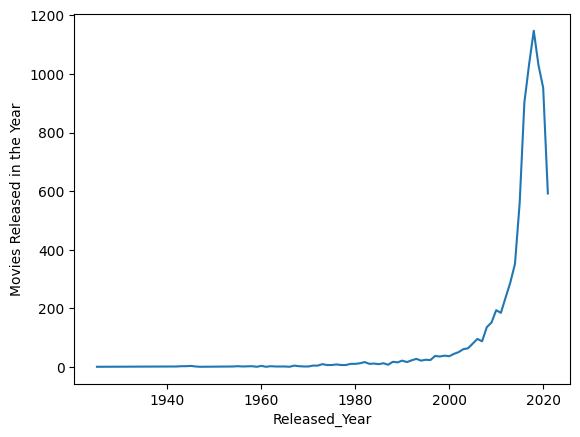

In [ ]:
df_year=N_df1.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
yeartrend=sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Released_Year")
plt.show()

Insights :

The content on Netflix has steady growth since 2008, and increasing in  new releases after 2015.

Observed the increasing trend was interrupted and started decreasing the content in Netflix during and after the COVID-19.

In [ ]:
type_df=N_df1.groupby(['type']).agg({'title':'nunique'}).reset_index()
type_df

type  title
0    Movie   6131
1  TV Show   2676

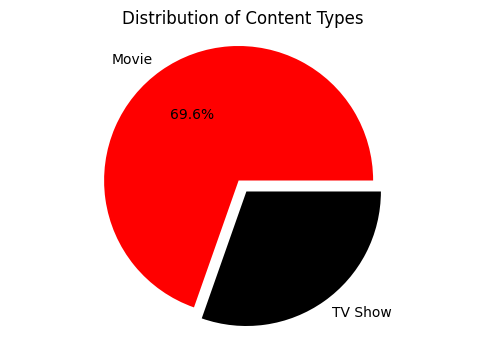

In [ ]:
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(6, 4))
plt.pie(type_df['title'], labels=type_df['type'], autopct='%1.1f%%', startangle=0,explode=(0.05,0.05),colors=['red','black'])
plt.title('Distribution of Content Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Insights:-
Observed that Movies content is more than Tv_shows content in the given Netflix dataset.

Percentage of Movies in Netflix = around 70% and Percentage of Tv_Shows in Netflix = around 30%

In [ ]:
#finding the count of unique titles of each country :-

c_df1= N_df1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
c_df1=c_df1[c_df1['country']!='Unknown_Country']
c_df1

country  title
119   United States   3689
47            India   1046
117  United Kingdom    804
22           Canada    445
38           France    393
..              ...    ...
101         Somalia      1
70         Mongolia      1
34          Ecuador      1
33     East Germany      1
36         Ethiopia      1

[127 rows x 2 columns]

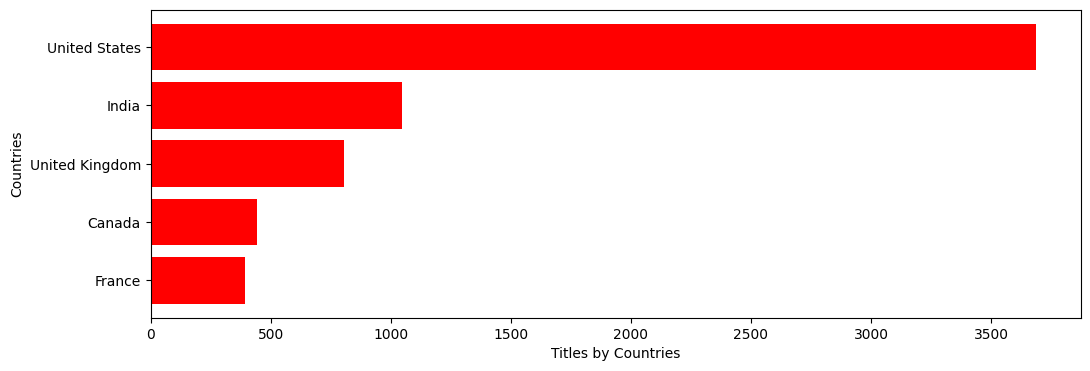

In [ ]:
c_df1= N_df1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:6]
c_df1=c_df1[c_df1['country']!='Unknown_Country']
plt.figure(figsize=(12,4))
plt.barh(c_df1[::-1]['country'],c_df1[::-1]['title'],color='red')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

Insights:-
The foremost contributors to content creation on Netflix, ranked by their prominence, are the United States, India, the United Kingdom, Canada, and France. These countries are at the forefront of producing a wide variety of titles on the platform, underscoring their pivotal influence in shaping Netflix's global content landscape.

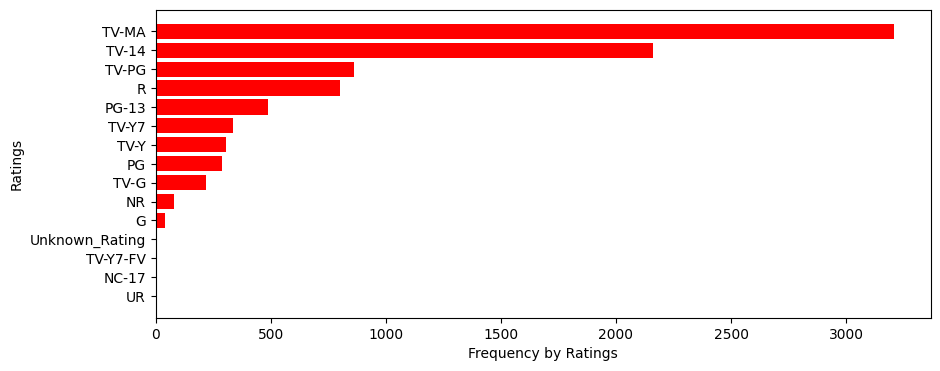

In [ ]:
r_df1=N_df1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[:15]
plt.figure(figsize=(10,4))
plt.barh(r_df1[::-1]['rating'], r_df1[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Observation:


Most of the content on Netflix is designed for mature audiences, including R-rated material and content that is not appropriate for viewers under 14 without parental supervision. This suggests that a large part of Netflix's library is aimed at older viewers and may feature themes, language, or scenes more suitable for adults.

# **4. Analysis of actors/directors of different types of shows/movies.**

In [ ]:
Genre=Movies.groupby(['genre'])[['show_id']].nunique().reset_index()
Genre.sort_values(by='show_id',ascending=False).head(5)


genre  show_id
11  International Movies     2752
7                 Dramas     2427
4               Comedies     1674
6          Documentaries      869
0     Action & Adventure      859

In [ ]:
Movies['country'].replace("","Unknown_Country",inplace=True)

In [ ]:
Ccountry=Movies.groupby(['country'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
Ccountry
#Ccountry1=Ccountry.drop(index="Unknown_Country",axis=1, inplace=True)
#Ccountry1

country  show_id
113    United States     2751
42             India      962
111   United Kingdom      532
115  Unknown_Country      441
19            Canada      319
33            France      303
35           Germany      182
99             Spain      171
50             Japan      119
22             China      114

In [ ]:
Rrating=Movies.groupby(["rating"])[["show_id"]].nunique().reset_index().sort_values(by="show_id",ascending=False).head(10)
Rrating

rating  show_id
8   TV-MA     2062
6   TV-14     1427
5       R      797
9   TV-PG      540
4   PG-13      490
3      PG      287
11  TV-Y7      139
10   TV-Y      131
7    TV-G      126
2      NR       75

#4 b. Identify the top 10 directors who have appeared in most movies or TV shows.
Grouping by each director and finding the count of unique titles of Tv-shows/movies

In [ ]:
Ddirector=Movies.groupby(['director'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
Ddirector

director  show_id
4539     Unknown_Director      188
3582        Rajiv Chilaka       22
1817            Jan Suter       21
3633          Raúl Campos       19
4261          Suhas Kadav       16
2739         Marcus Raboy       15
1862            Jay Karas       15
727   Cathy Garcia-Molina       13
2815      Martin Scorsese       12
1859          Jay Chapman       12

## 4  a. Identify the top 10 actors who have appeared in most movies or TV shows.
## Grouping by each actor and finding the count of unique titles of Tv-shows/movies

In [ ]:
Aactor=Movies.groupby(['cast'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
Aactor

cast  show_id
24460     Unknown_Actor      475
2105        Anupam Kher       42
21781    Shah Rukh Khan       35
17193  Naseeruddin Shah       32
18064           Om Puri       30
638        Akshay Kumar       30
18329      Paresh Rawal       28
12031     Julie Tejwani       28
1313   Amitabh Bachchan       28
20692      Rupa Bhimani       27

In [ ]:
Genre=Movies.groupby(['genre'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
Genre

genre  show_id
11      International Movies     2752
7                     Dramas     2427
4                   Comedies     1674
6              Documentaries      869
0         Action & Adventure      859
10        Independent Movies      756
2   Children & Family Movies      641
15           Romantic Movies      616
19                 Thrillers      577
14          Music & Musicals      375

Text(0.5, 1.0, 'Top 10 Movie Actors')

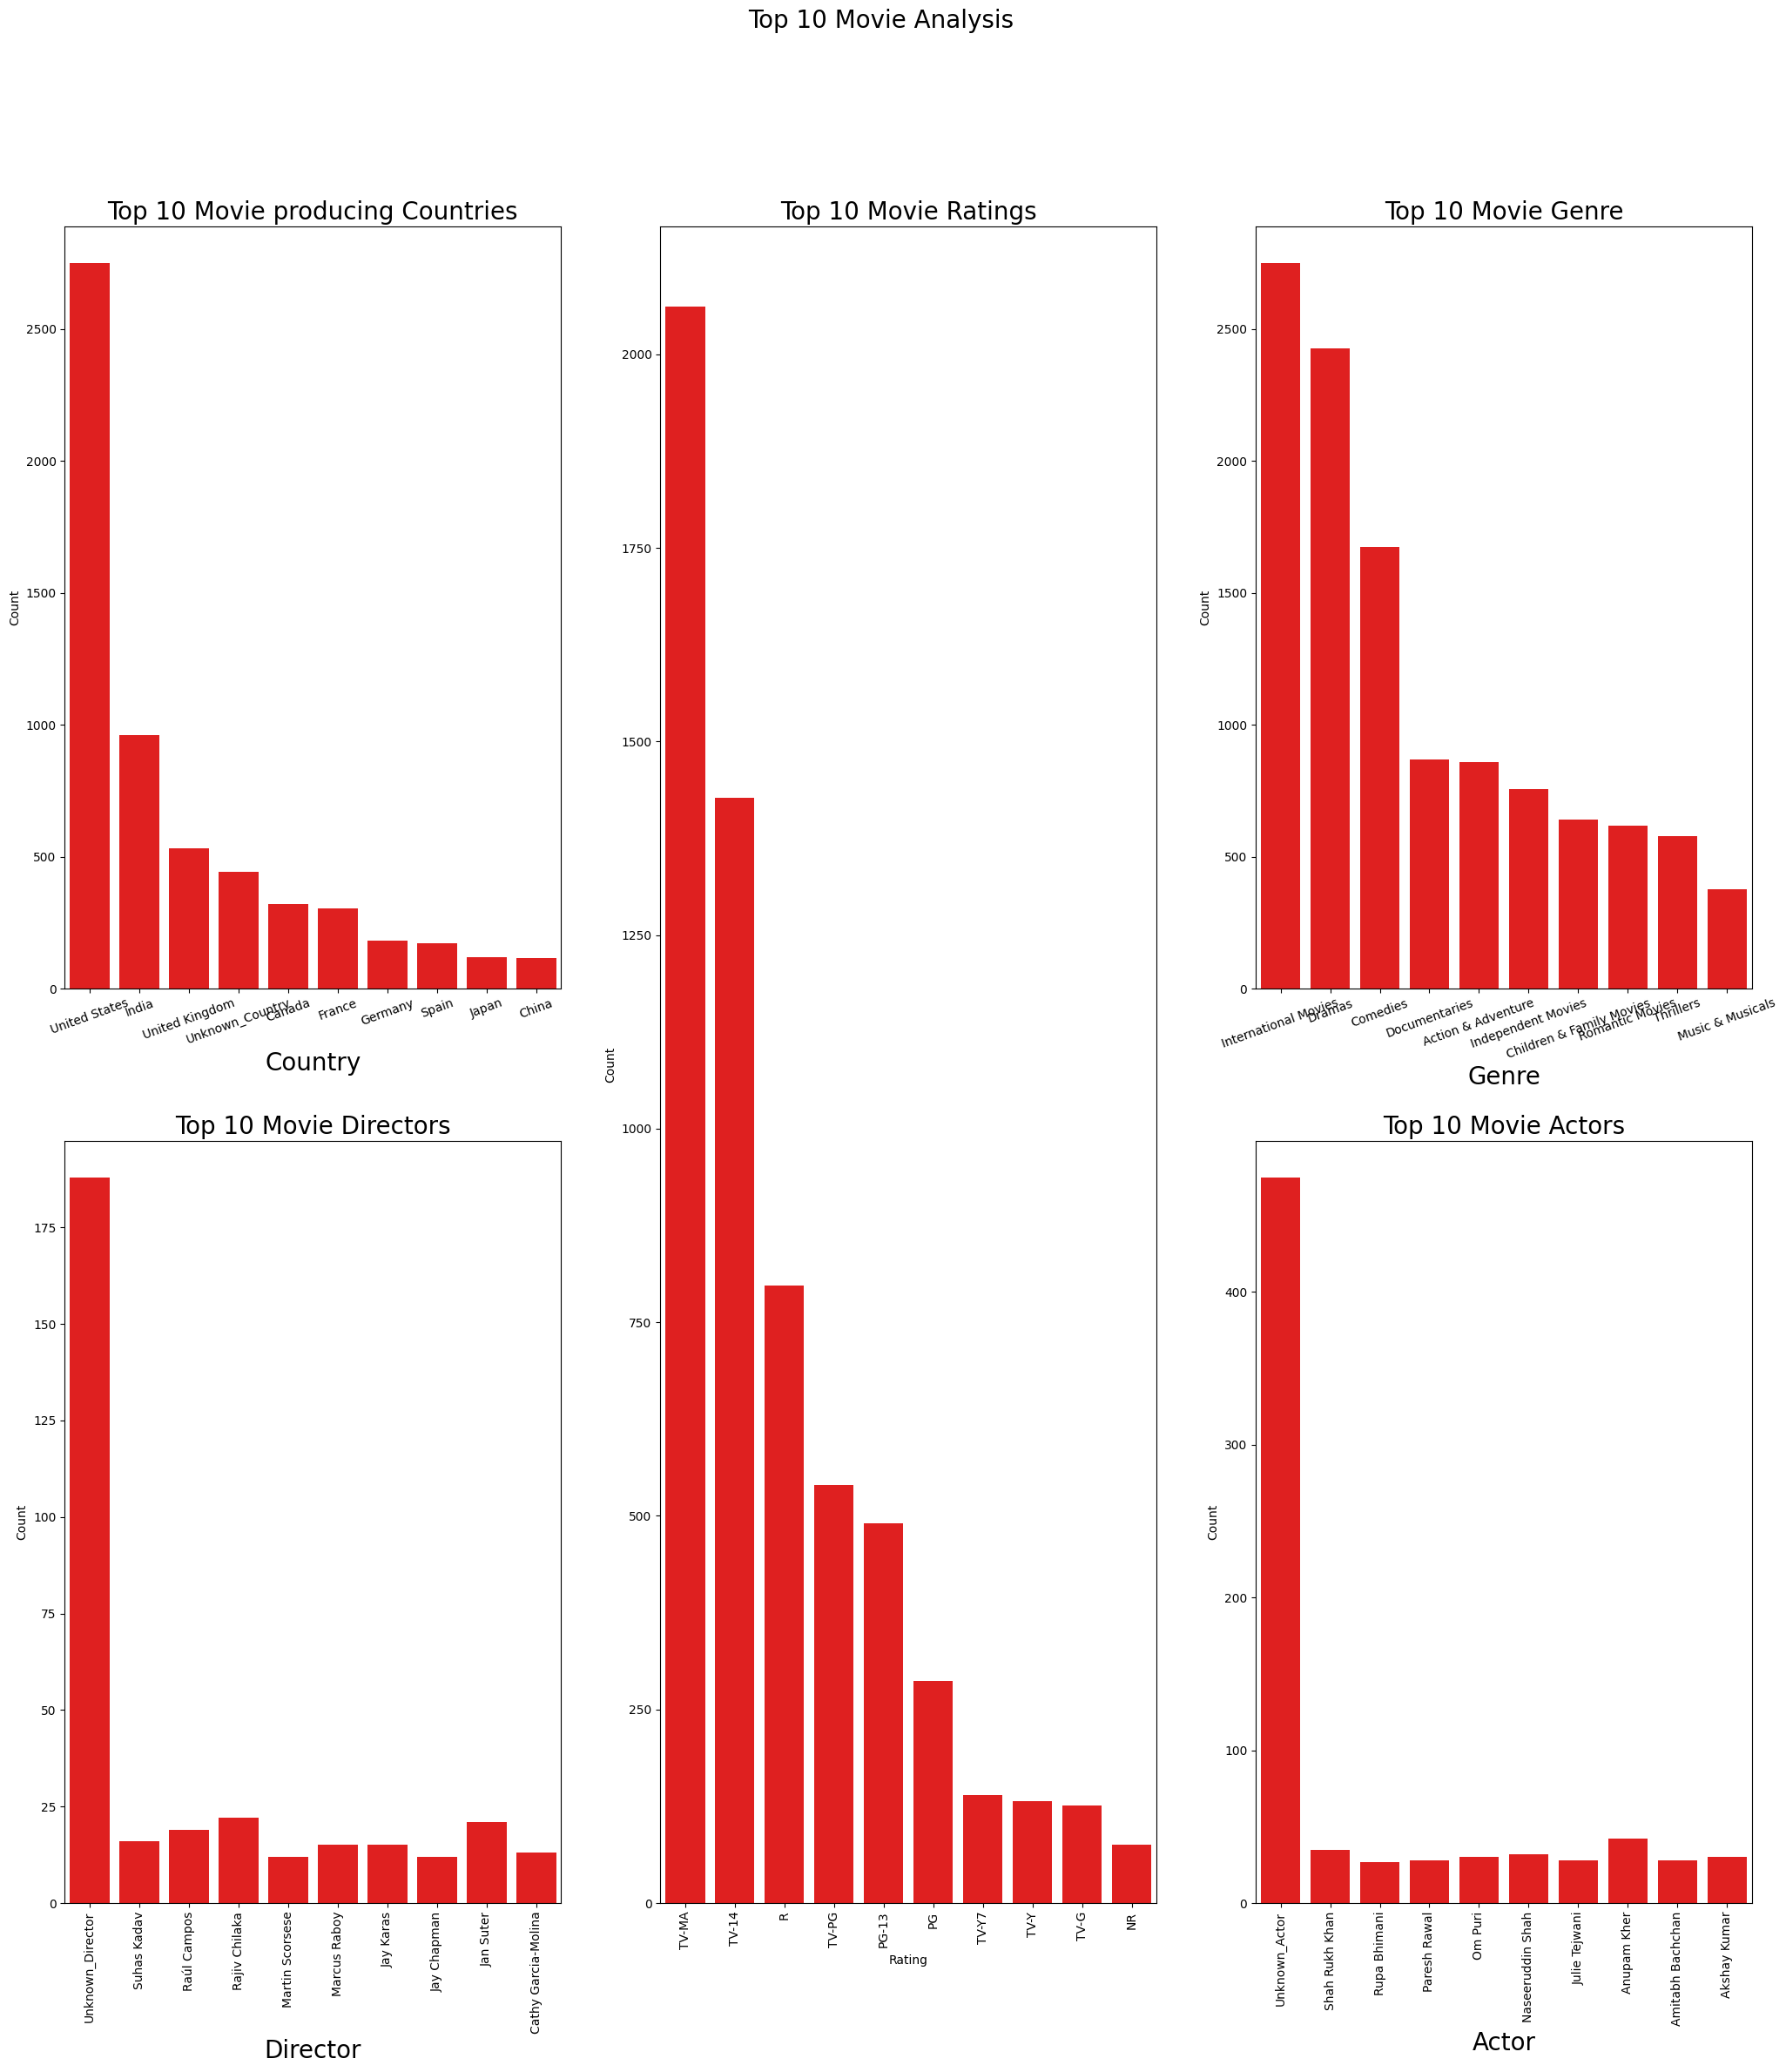

In [ ]:
plt.figure(figsize=(25,25)).suptitle("Top 10 Movie Analysis",fontsize=20)
#Country
plt.subplot(2,3,1)
sns.barplot(Ccountry.sort_values(by='show_id',ascending=False).head(10),x='country',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count')
plt.title('Top 10 Movie producing Countries',fontsize=20)
#Genre
plt.subplot(2,3,3)
sns.barplot(Genre.sort_values(by='show_id',ascending=False).head(10),x='genre',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Count')
plt.title('Top 10 Movie Genre',fontsize=20)
#Rating
plt.subplot(1,3,2)
sns.barplot(Rrating.sort_values(by='show_id',ascending=False).head(10),x='rating',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Rating',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 Movie Ratings',fontsize=20)
#Director
plt.subplot(2,3,4)
sns.barplot(Ddirector.sort_values(by='director',ascending=False).head(10),x='director',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Director',fontsize=20)
plt.ylabel('Count')
plt.title('Top 10 Movie Directors',fontsize=20)
#Actor
plt.subplot(2,3,6)
sns.barplot(Aactor.sort_values(by='cast',ascending=False).head(10),x='cast',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Actor',fontsize=20)
plt.ylabel('Count')
plt.title('Top 10 Movie Actors',fontsize=20)

# Top 10 Analysis on TV_Shows

In [ ]:
Country_Top10TVShows=TV_Show.groupby(['country'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
Country_Top10TVShows

country  show_id
63    United States      938
64  Unknown_Country      391
62   United Kingdom      272
30            Japan      199
52      South Korea      170
8            Canada      126
19           France       90
25            India       84
57           Taiwan       70
2         Australia       66

In [ ]:
genre_top10intvshows =TV_Show.groupby(['genre'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
genre_top10intvshows

genre  show_id
5   International TV Shows     1351
15               TV Dramas      763
14             TV Comedies      581
3           Crime TV Shows      470
6                 Kids' TV      451
4               Docuseries      395
9        Romantic TV Shows      370
8               Reality TV      255
1         British TV Shows      253
0             Anime Series      176

In [ ]:
rating_top10intvshows=TV_Show.groupby(['rating'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
rating_top10intvshows

rating  show_id
4           TV-MA     1145
2           TV-14      733
5           TV-PG      323
7           TV-Y7      195
6            TV-Y      176
3            TV-G       94
0              NR        5
1               R        2
9  Unknown_Rating        2
8        TV-Y7-FV        1

In [ ]:
directors_top10intvshows=TV_Show.groupby(['director'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
directors_top10intvshows

director  show_id
284       Unknown_Director     2446
146              Ken Burns        3
8      Alastair Fothergill        3
259            Stan Lathan        2
128          Joe Berlinger        2
100            Hsu Fu-chun        2
84   Gautham Vasudev Menon        2
103         Iginio Straffi        2
168            Lynn Novick        2
251            Shin Won-ho        2

In [ ]:
actors_top10intvshows=TV_Show.groupby(['cast'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(10)
actors_top10intvshows

cast  show_id
13892       Unknown_Actor      350
13230    Takahiro Sakurai       25
14581           Yuki Kaji       19
6804       Junichi Suwabe       17
2874          Daisuke Ono       17
252             Ai Kayano       17
14565     Yuichi Nakamura       16
6761         Jun Fukuyama       15
14497    Yoshimasa Hosoya       15
3127   David Attenborough       14

Text(0.5, 1.0, 'Top 10 TV_Show Actors')

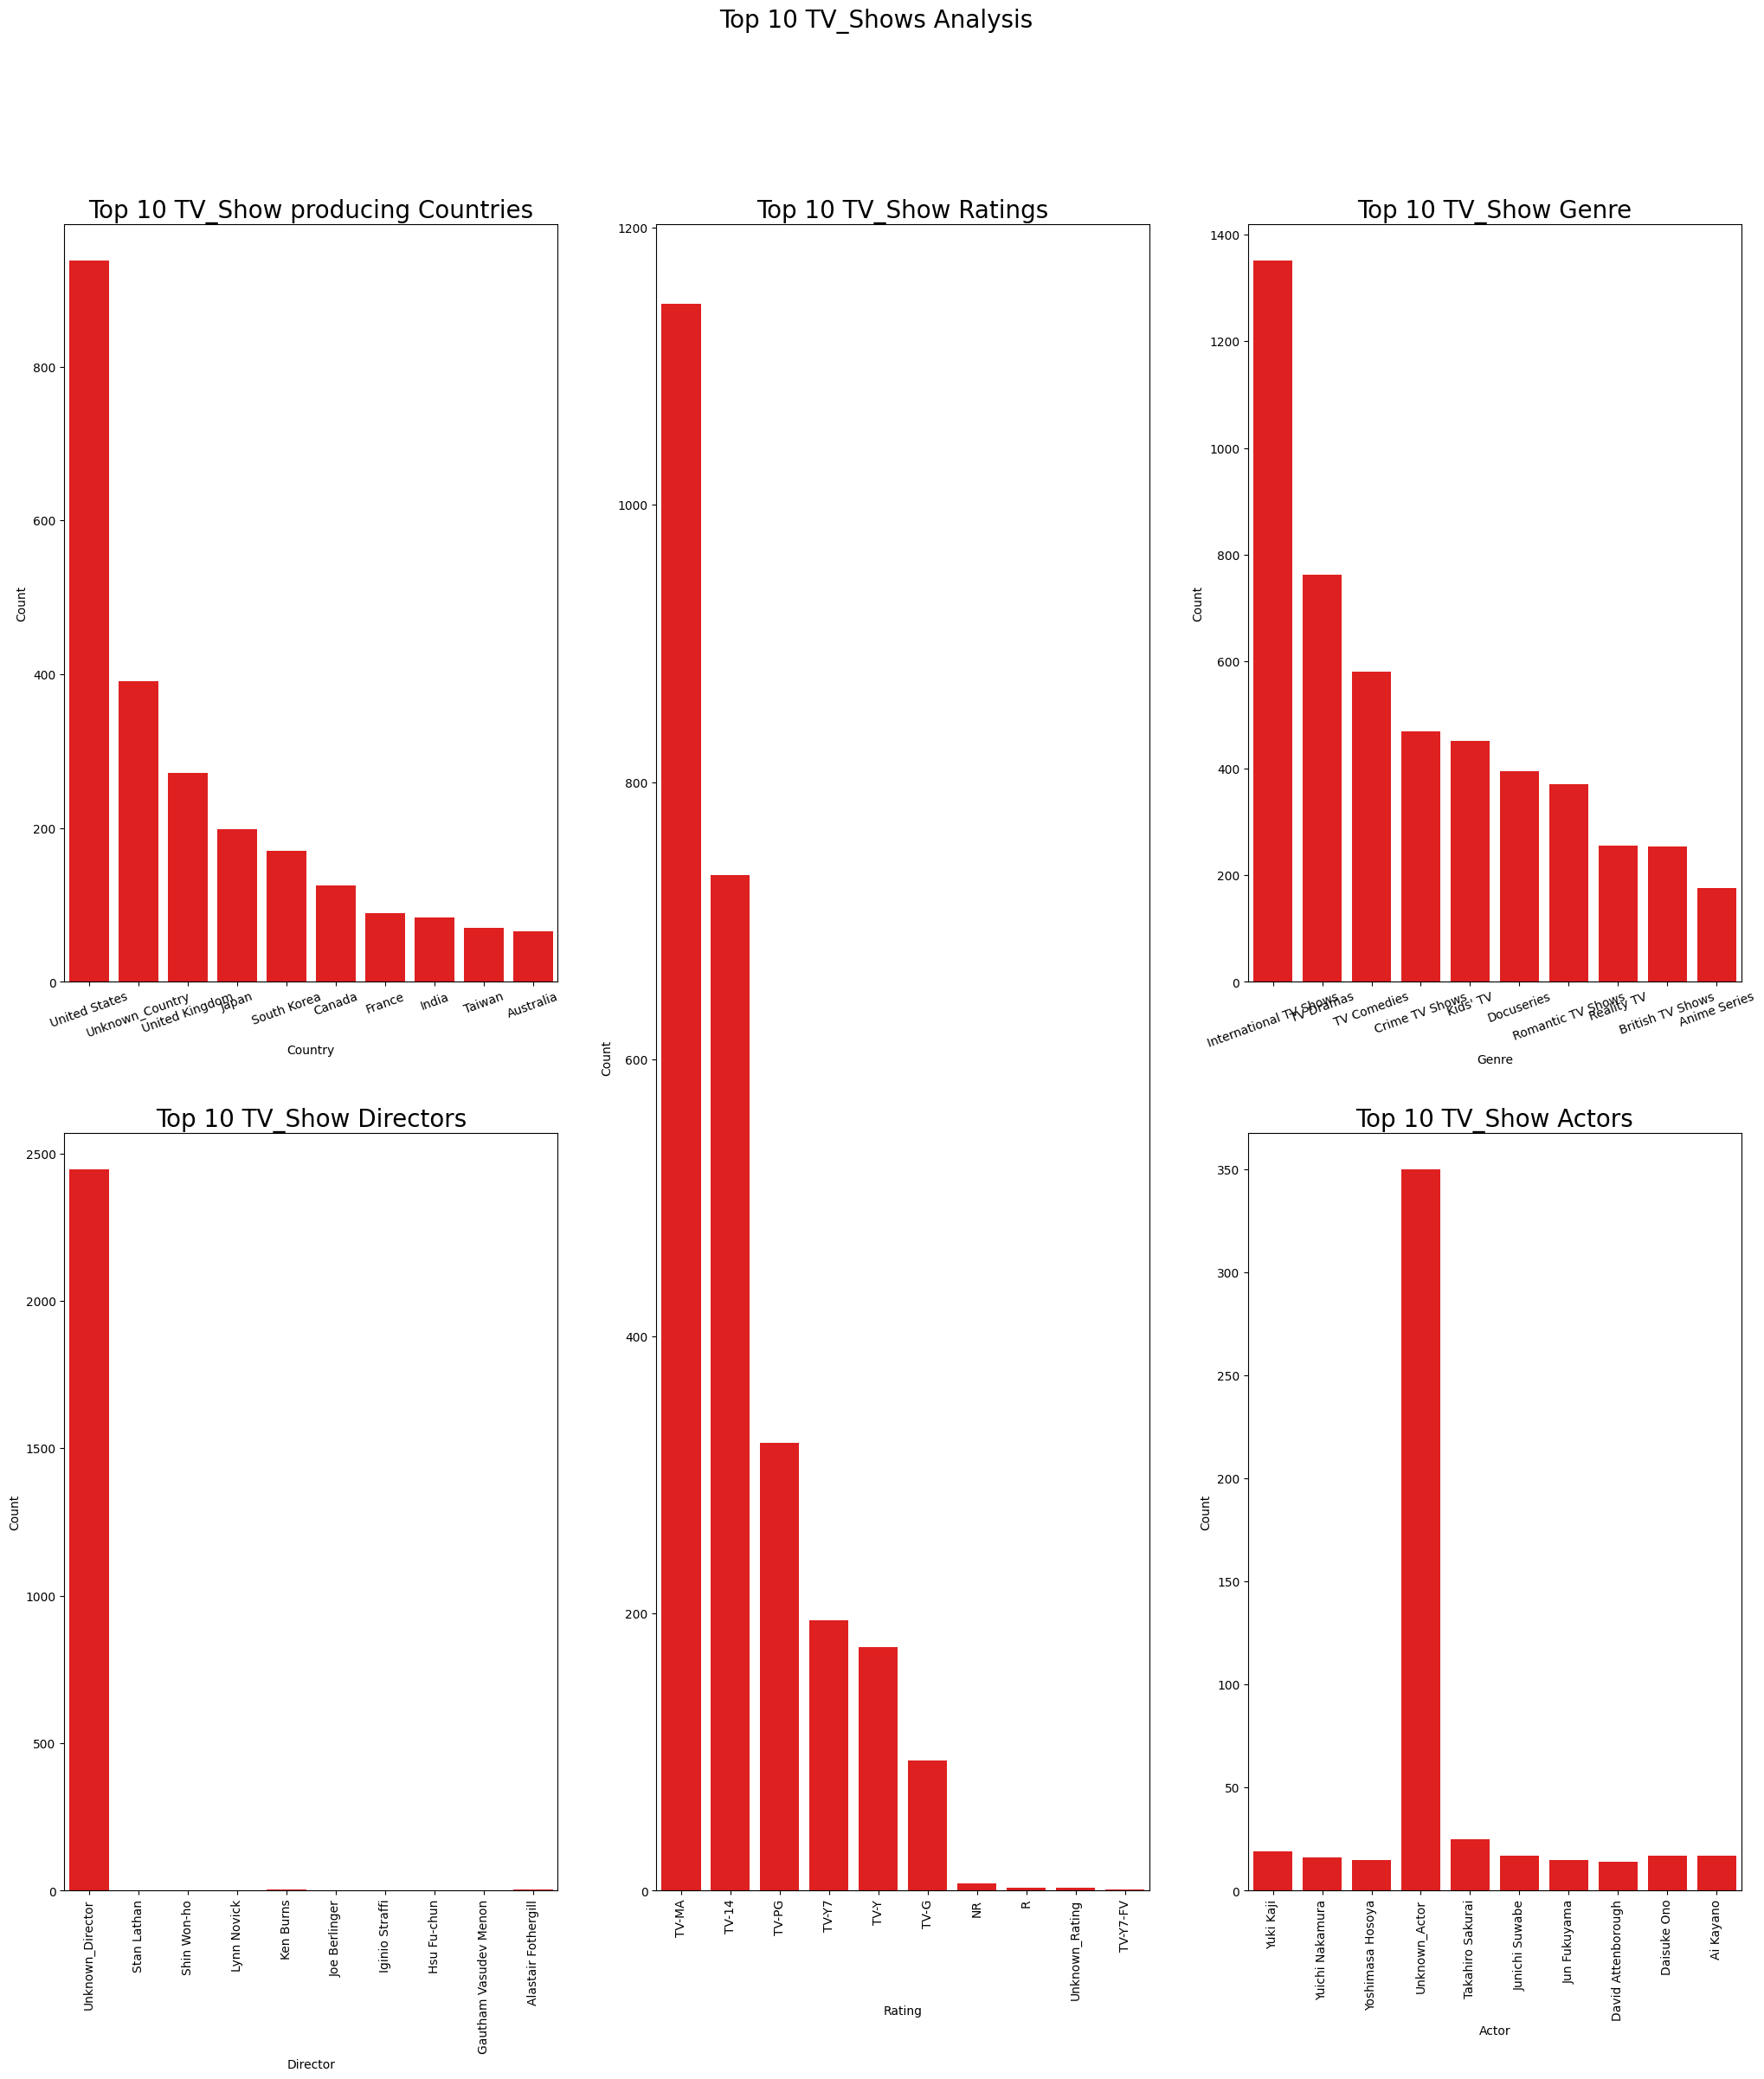

In [ ]:
plt.figure(figsize=(25,25)).suptitle("Top 10 TV_Shows Analysis",fontsize=20)
#Country
plt.subplot(2,3,1)
sns.barplot(Country_Top10TVShows.sort_values(by='show_id',ascending=False).head(10),x='country',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Country',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 TV_Show producing Countries',fontsize=20)
#Genre
plt.subplot(2,3,3)
sns.barplot(genre_top10intvshows.sort_values(by='show_id',ascending=False).head(10),x='genre',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Genre',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 TV_Show Genre',fontsize=20)
#Rating
plt.subplot(1,3,2)
sns.barplot(rating_top10intvshows.sort_values(by='show_id',ascending=False).head(10),x='rating',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Rating',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 TV_Show Ratings',fontsize=20)
#Director
plt.subplot(2,3,4)
sns.barplot(directors_top10intvshows.sort_values(by='director',ascending=False).head(10),x='director',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Director',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 TV_Show Directors',fontsize=20)
#Actor
plt.subplot(2,3,6)
sns.barplot(actors_top10intvshows.sort_values(by='cast',ascending=False).head(10),x='cast',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Actor',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 TV_Show Actors',fontsize=20)

# **3. What is the best time to launch a TV show?**

# a. Analysis on the best week to release the Tv-show or the movie.

In [ ]:
Movies[['dur','n']]=Movies['duration'].str.split(" ",expand=True)

In [ ]:
Movies['dur']=Movies['dur'].astype(int)

In [ ]:
Movies.head(2)

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type date_added  release_year  \
0      United States    Unknown_Actor      s1  Movie 2021-09-25          2020   
159  Unknown_Country  Vanessa Hudgens      s7  Movie 2021-09-24          2021   

    rating duration                                        description  \
0    PG-13   90 min  As her father nears the end of his life, filmm...   
159     PG   91 min  Equestria's divided. But a bright-eyed hero be...   

            director day_name_added  month_added  year_added  week_added  \
0    Kirsten Johnson       Saturday            9        2021          38   
159    Robert Cullen         Friday            9        2021          38   

     day_added  dur    n  
0           25   90  min  
159         24   91  min

# Best Week to release movies

In [ ]:
Movies_Release_Best_Week=Movies.groupby(["week_added"])["show_id"].nunique().reset_index().sort_values(by="show_id",ascending=False)
Movies_Release_Best_Week.head()


week_added  show_id
0            1      316
43          44      243
39          40      215
8            9      207
25          26      195

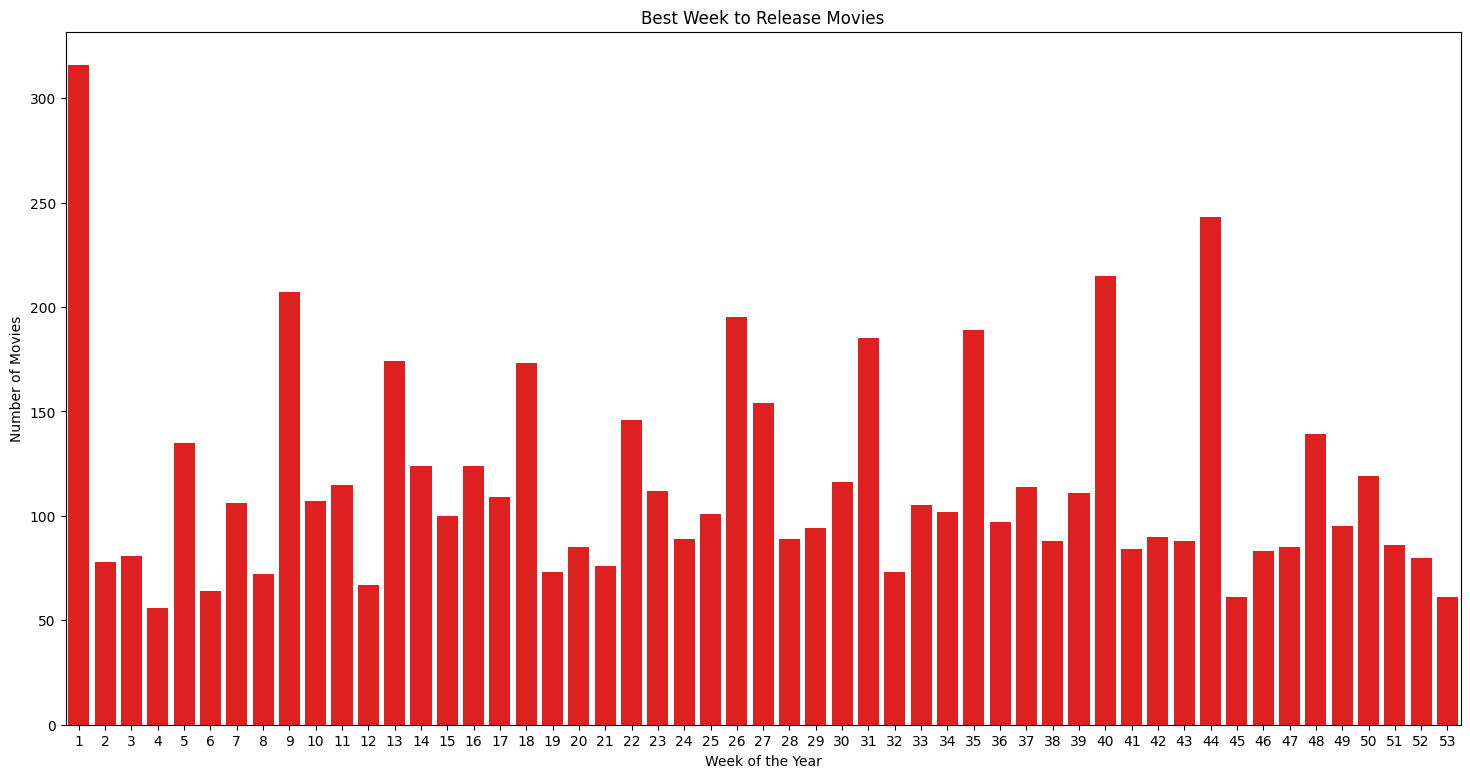

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(data=Movies_Release_Best_Week,x="week_added",y="show_id",color="red")
plt.title('Best Week to Release Movies')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Movies')
plt.show()

Insights:-

Based on the plot, it can be concluded that the optimal time to release movies is the first week of the year, followed by the 44th week. The least favorable week for releases is the 4th week of the year.


Peak Release Times:

*   Notable peaks around weeks 40 and 52 indicate popular release periods, likely aligning with holidays or festivals.

*  Release Distribution:
The frequency of movie releases fluctuates throughout the year, with certain weeks experiencing higher activity than others.

*  End-of-Year Surge:
There is a marked increase in movie releases towards the end of the year, potentially aimed at award season or holiday viewership. This pattern suggests that Netflix strategically times releases to maximize audience engagement, reflecting a seasonal approach.












In [ ]:
Movies.head(2)

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type date_added  release_year  \
0      United States    Unknown_Actor      s1  Movie 2021-09-25          2020   
159  Unknown_Country  Vanessa Hudgens      s7  Movie 2021-09-24          2021   

    rating duration                                        description  \
0    PG-13   90 min  As her father nears the end of his life, filmm...   
159     PG   91 min  Equestria's divided. But a bright-eyed hero be...   

            director day_name_added  month_added  year_added  week_added  \
0    Kirsten Johnson       Saturday            9        2021          38   
159    Robert Cullen         Friday            9        2021          38   

     day_added  dur    n  
0           25   90  min  
159         24   91  min

In [ ]:
Movies.groupby(['day_name_added'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False)

day_name_added  show_id
0         Friday     1566
4       Thursday     1053
6      Wednesday      906
5        Tuesday      852
1         Monday      628
3         Sunday      569
2       Saturday      557

Insight :- Friday is the most popular day for Netflix to add new movies to its catalogue, likely reflecting a strategic decision to capitalize on increased weekend viewership.

In [ ]:
Movies_Release_Best_Week=Movies.groupby(['week_added'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False)

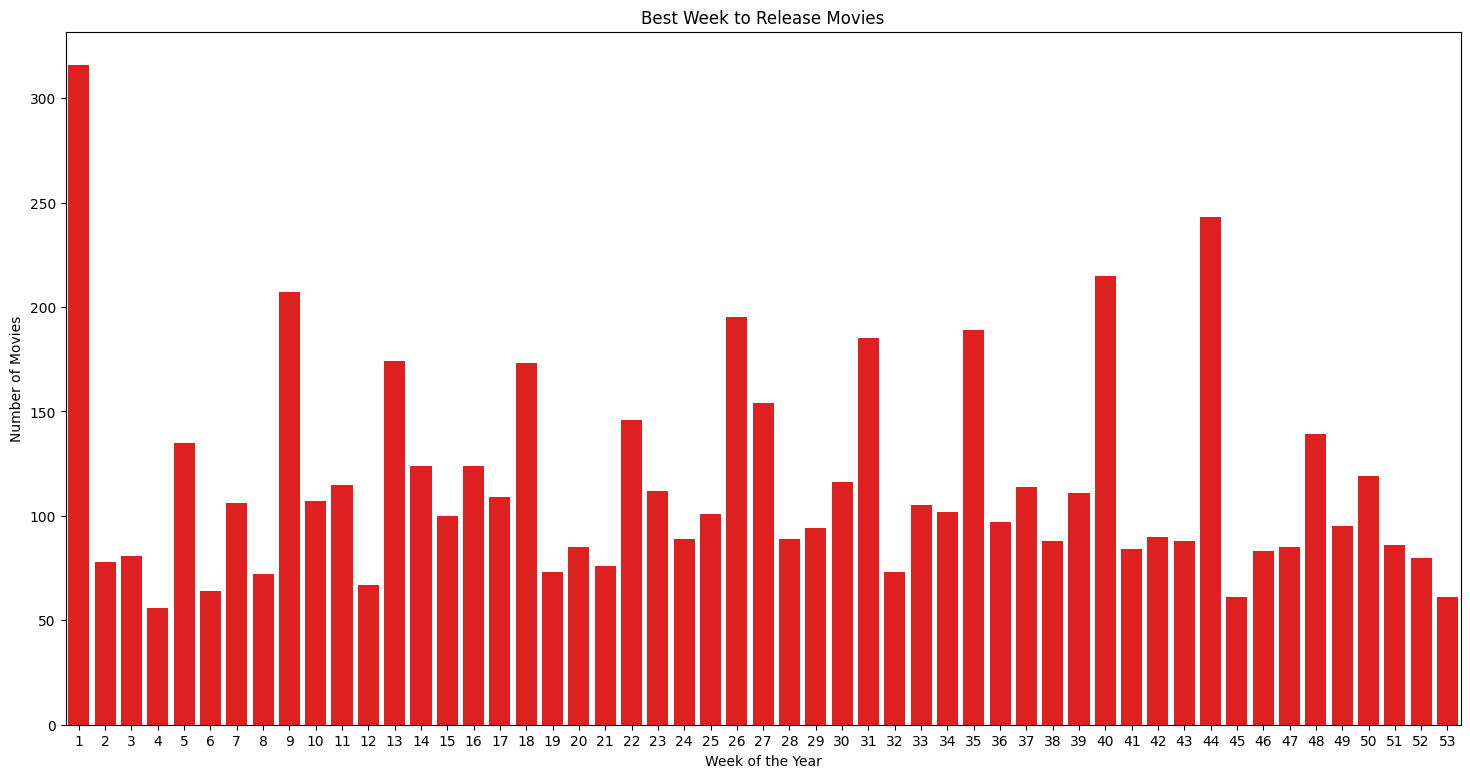

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(data=Movies_Release_Best_Week,x="week_added",y="show_id",color="red")
plt.title('Best Week to Release Movies')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Movies')
plt.show()

Insights:-

Based on the plot, it can be concluded that the optimal time to release movies is the first week of the year, followed by the 44th week. The least favorable week for releases is the 4th week of the year.


Peak Release Times:

*   Notable peaks around weeks 40 and 52 indicate popular release periods, likely aligning with holidays or festivals.

*  Release Distribution:
The frequency of movie releases fluctuates throughout the year, with certain weeks experiencing higher activity than others.

*  End-of-Year Surge:
There is a marked increase in movie releases towards the end of the year, potentially aimed at award season or holiday viewership. This pattern suggests that Netflix strategically times releases to maximize audience engagement, reflecting a seasonal approach.

# Best week to release TV Shows

In [ ]:
TV_Show[['dur','n']]=TV_Show['duration'].str.split(" ",expand=True)

In [ ]:
TV_Show['dur']=TV_Show['dur'].astype(int)

In [ ]:
TV_Show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56148 entries, 1 to 201934
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           56148 non-null  object        
 1   genre           56148 non-null  object        
 2   country         56148 non-null  object        
 3   cast            56148 non-null  object        
 4   show_id         56148 non-null  object        
 5   type            56148 non-null  object        
 6   date_added      56148 non-null  datetime64[ns]
 7   release_year    56148 non-null  int64         
 8   rating          56148 non-null  object        
 9   duration        56148 non-null  object        
 10  description     56148 non-null  object        
 11  director        56148 non-null  object        
 12  day_name_added  56148 non-null  object        
 13  month_added     56148 non-null  int32         
 14  year_added      56148 non-null  int32         
 15  week_a

In [ ]:
TV_Show_Release_Best_Week=TV_Show.groupby(["week_added"])["show_id"].nunique().reset_index().sort_values(by="show_id",ascending=False)
TV_Show_Release_Best_Week


week_added  show_id
26          27       86
30          31       83
12          13       76
43          44       75
23          24       75
4            5       74
34          35       74
25          26       73
39          40       72
49          50       70
36          37       69
17          18       61
47          48       60
21          22       60
38          39       57
0            1       56
51          52       52
14          15       52
45          46       51
37          38       51
50          51       51
31          32       49
13          14       49
32          33       48
10          11       48
8            9       47
35          36       46
28          29       46
19          20       46
16          17       46
41          42       45
48          49       45
29          30       44
18          19       44
52          53       43
24          25       43
11          12       43
6            7       42
33          34       41
27          28       41
20          21       41
22          23       39
7            8       38
15          16       37
44          45       37
46          47       35
5            6       33
3            4       32
2            3       32
40          41       32
1            2       30
42          43       28
9           10       28

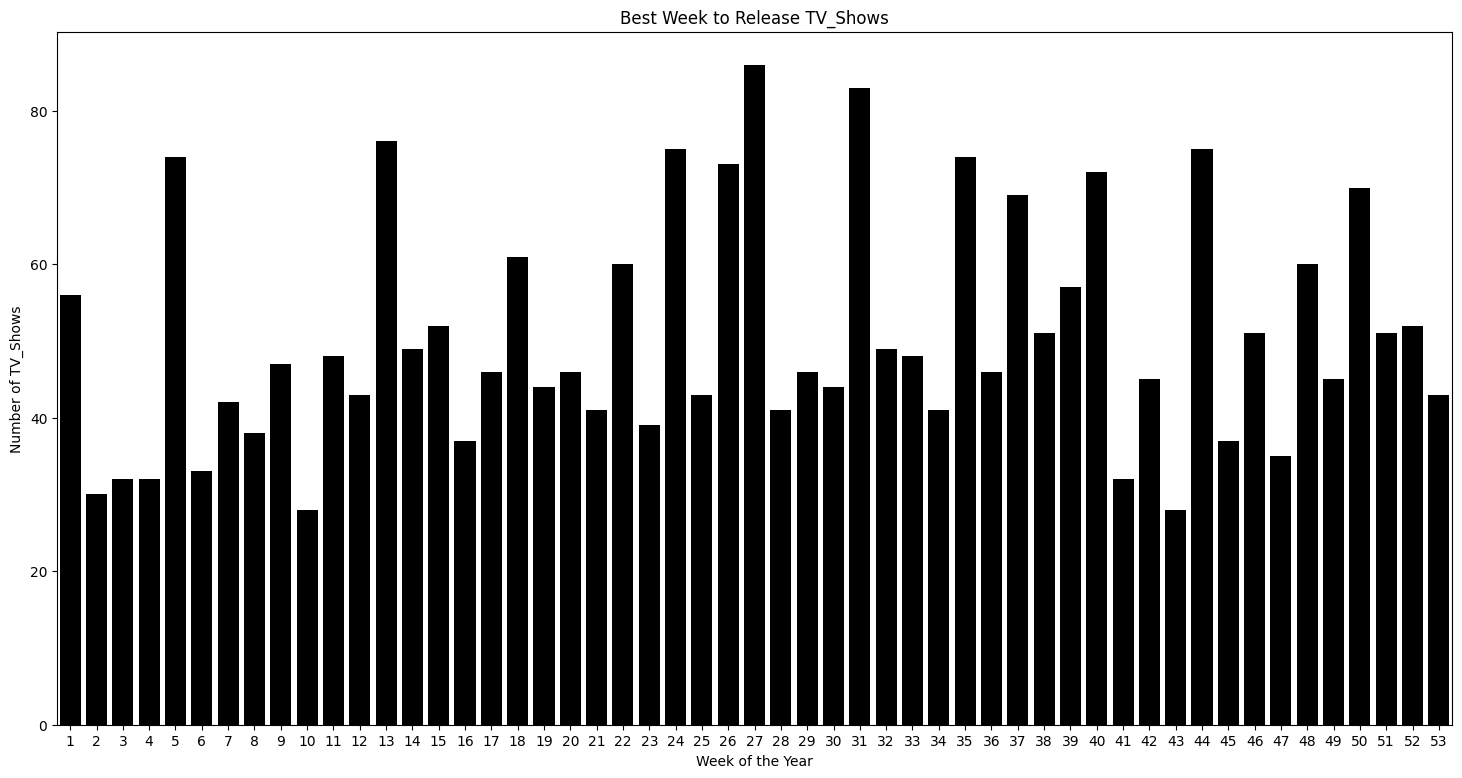

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(data=TV_Show_Release_Best_Week,x="week_added",y="show_id",color="black")
plt.title('Best Week to Release TV_Shows')
plt.xlabel('Week of the Year')
plt.ylabel('Number of TV_Shows')
plt.show()

# Insights

The ideal week to release a TV show is the 27th week of the year, followed by the 31st week. The least favorable time to release a TV show is the 10th week.



* Key Release Peaks:
There are significant peaks in the 27th and 31st weeks of the year, with up to 80 shows released in each of these weeks.


* Release Trends:
The graph reveals variations in the number of TV shows released each week, highlighting seasonal trends and strategic timing by networks



.

# 3 . b . Best month to release the Tv-show or the movies :

# Best month to release the movies:

In [ ]:
Movies_Release_Best_month=Movies.groupby(["month_added"])["show_id"].nunique().reset_index().sort_values(by="show_id",ascending=False)
Movies_Release_Best_month.head()

month_added  show_id
6             7      565
3             4      550
11           12      547
0             1      546
9            10      545

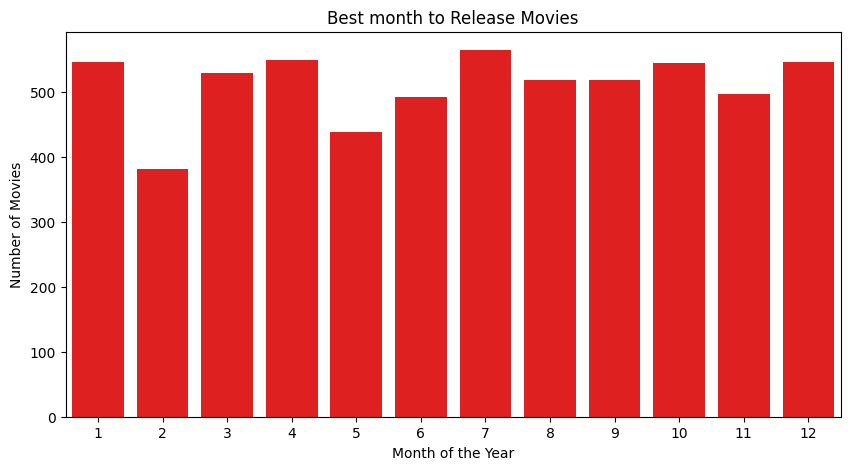

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=Movies_Release_Best_month,x="month_added",y="show_id",color="red")
plt.title('Best month to Release Movies')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Movies')
plt.show()

# Insights :

The optimal time to release movies is in July, while the least favorable month is February.

*   
Popular Release Months:
January, April, July, and December are the most popular months for movie releases, with the highest number of new movies debuting during these times. This trend likely correlates with Festivals and holiday seasons, which attract more moviegoers


# Best Month To release TV Shows :

In [ ]:

TVshow_Release_Best_month1=TV_Show.groupby(["month_added"])["show_id"].nunique().reset_index().sort_values(by="show_id",ascending=False)
TVshow_Release_Best_month1['month_added'] = TVshow_Release_Best_month1['month_added'].astype(int)
TVshow_Release_Best_month1

month_added  show_id
11           12      266
6             7      262
8             9      253
5             6      237
7             8      236
9            10      216
3             4      215
2             3      214
10           11      207
4             5      195
0             1      192
1             2      183

Insight:- July and December emerge as the best months for launching new TV shows on Netflix, according to observed trends.**

Text(0, 0.5, 'Number of TV Shows Released')

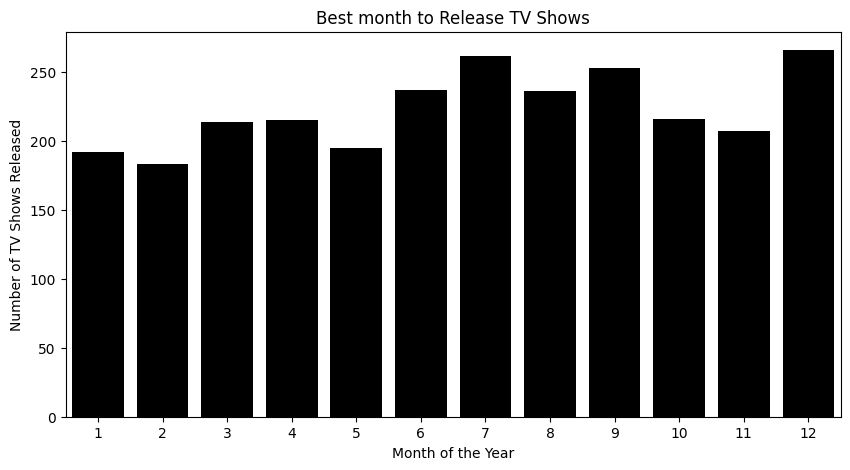

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='month_added', y='show_id', data=TVshow_Release_Best_month1,color="black")
plt.title('Best month to Release TV Shows')
plt.xlabel('Month of the Year')
plt.ylabel('Number of TV Shows Released')

Insights :
The optimal month for releasing TV shows is in July and December, whereas the least favorable month is in February.

Strategic Planning:
This chart can help networks in planning their release schedules and assist advertisers in targeting their campaigns effectively.

Insights from Data:
The data indicates that certain months are favored for releases, likely due to seasonal viewer availability or prevailing industry trends.

In [ ]:
TV_Show.groupby(TV_Show['day_added'])['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)

day_added  show_id
0           1      525
14         15      229
29         30       91
30         31       88
1           2       86
9          10       81
21         22       80
19         20       80
13         14       77
18         19       75
15         16       74
7           8       73
16         17       71
5           6       69
17         18       69
26         27       66
6           7       63
4           5       63
20         21       60
22         23       60
3           4       59
11         12       59
23         24       58
24         25       58
27         28       56
8           9       54
25         26       54
12         13       53
2           3       52
10         11       49
28         29       44

Insight : - Friday stands out as the favored day for Netflix to release new TV shows, likely aligning with strategic scheduling to maximize viewership during the upcoming weekend.

# 5. Analysis on  genre movies which are more popular or produced more

# Word Cloud
#Installing wordcloud

In [ ]:
!pip install wordcloud

Most popular Movie genres on Netflix

In [ ]:
Movies_ll_genres = ' '.join(Movies['genre'].dropna().str.replace(',', ' ').values)
Movies_ll_genres

In [ ]:
color = sns.color_palette("dark:red", as_cmap=True)

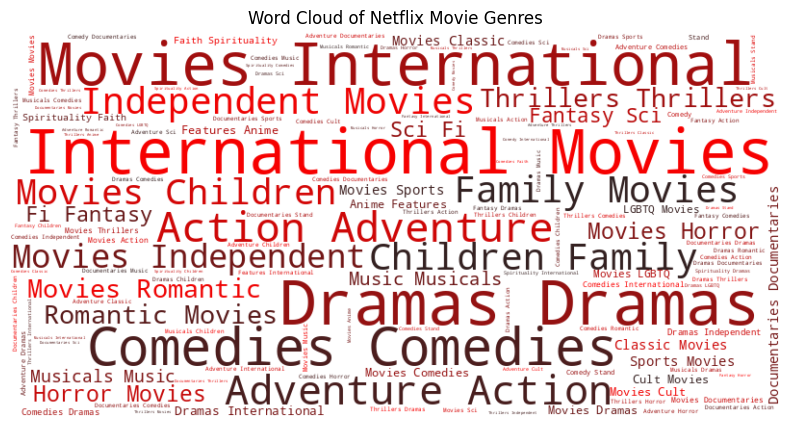

In [ ]:

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap=color).generate(Movies_ll_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Netflix Movie Genres')
plt.show()


Insights:

*   Popular Movie Genres: Netflix viewers gravitate towards International Movies, Comedies, Dramas, Action, and Romantic films.

*  Diverse Content: The platform offers a wide array of genres, including “Action Adventure,” “Documentaries,” and “Independent Movies,” ensuring there’s something for every viewer's preference.

*   Specialized Categories: Genres like “Romantic Movies,” “Children Family,” and “Musicals” cater specifically to distinct audience demographics, enhancing Netflix's appeal across various viewer interests.












Most popular TV Shows genres on Netflix :

In [ ]:
TV_Shows_all_genres = ' '.join(TV_Show['genre'].dropna().str.replace(',', ' ').values)
TV_Shows_all_genres

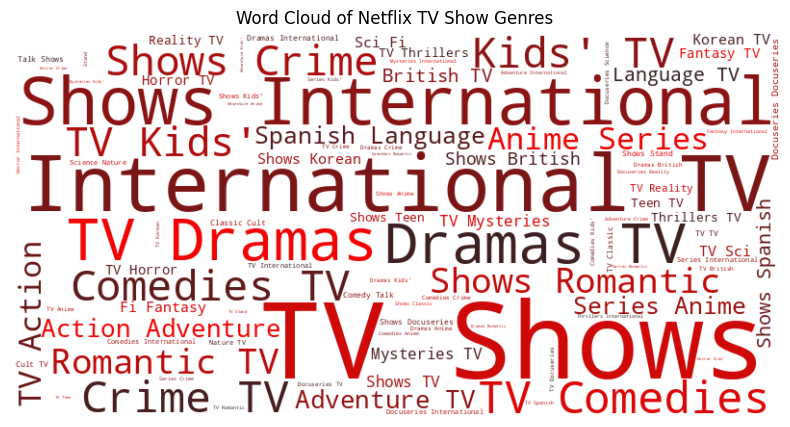

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap=color).generate(TV_Shows_all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Netflix TV Show Genres')
plt.show()


Insights :

*  Popular TV Show Genres: Netflix viewers favor genres such as Drama, Crime, Romance, Kids' content, Comedies, and International series.
Dominant Genres: The prominence of "TV," "Shows," "Dramas," and "International" suggests these are among the most frequently watched or highly rated genres.
*  Genre Diversity: The availability of "Comedies," "Crime," "Action," and "Romantic" genres highlights a broad spectrum of TV shows catering to diverse viewer preferences.
*   Specialized Offerings: Additional genres like "Docuseries British," "Fantasy," and "Kids" indicate specialized content that appeals to specific audience segments.










# 6. Analysis on  after how many days the movie will be added to Netflix after the release of the movie.

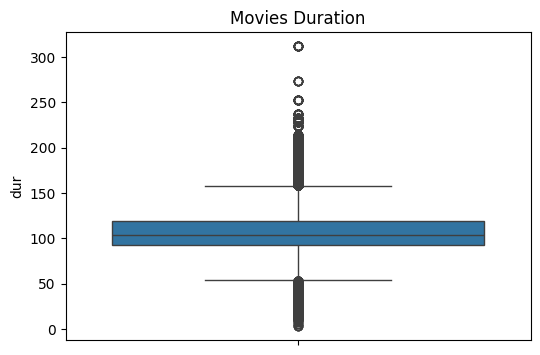

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=Movies['dur'])
plt.title('Movies Duration')
plt.show()

Insight :-The median movie duration on Netflix is 100 minutes, meaning that 50% of the movies have a runtime of 100 minutes or less, while the other 50% have a runtime of 100 minutes or more.

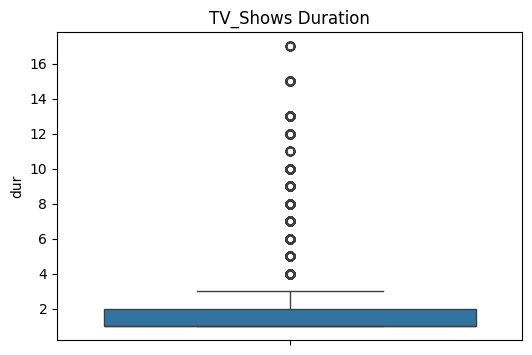

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=TV_Show["dur"])
plt.title('TV_Shows Duration')
plt.show()

Insight:-Most TV shows on Netflix have only one season, indicating that a substantial number of the platform's TV series are limited to a single season.








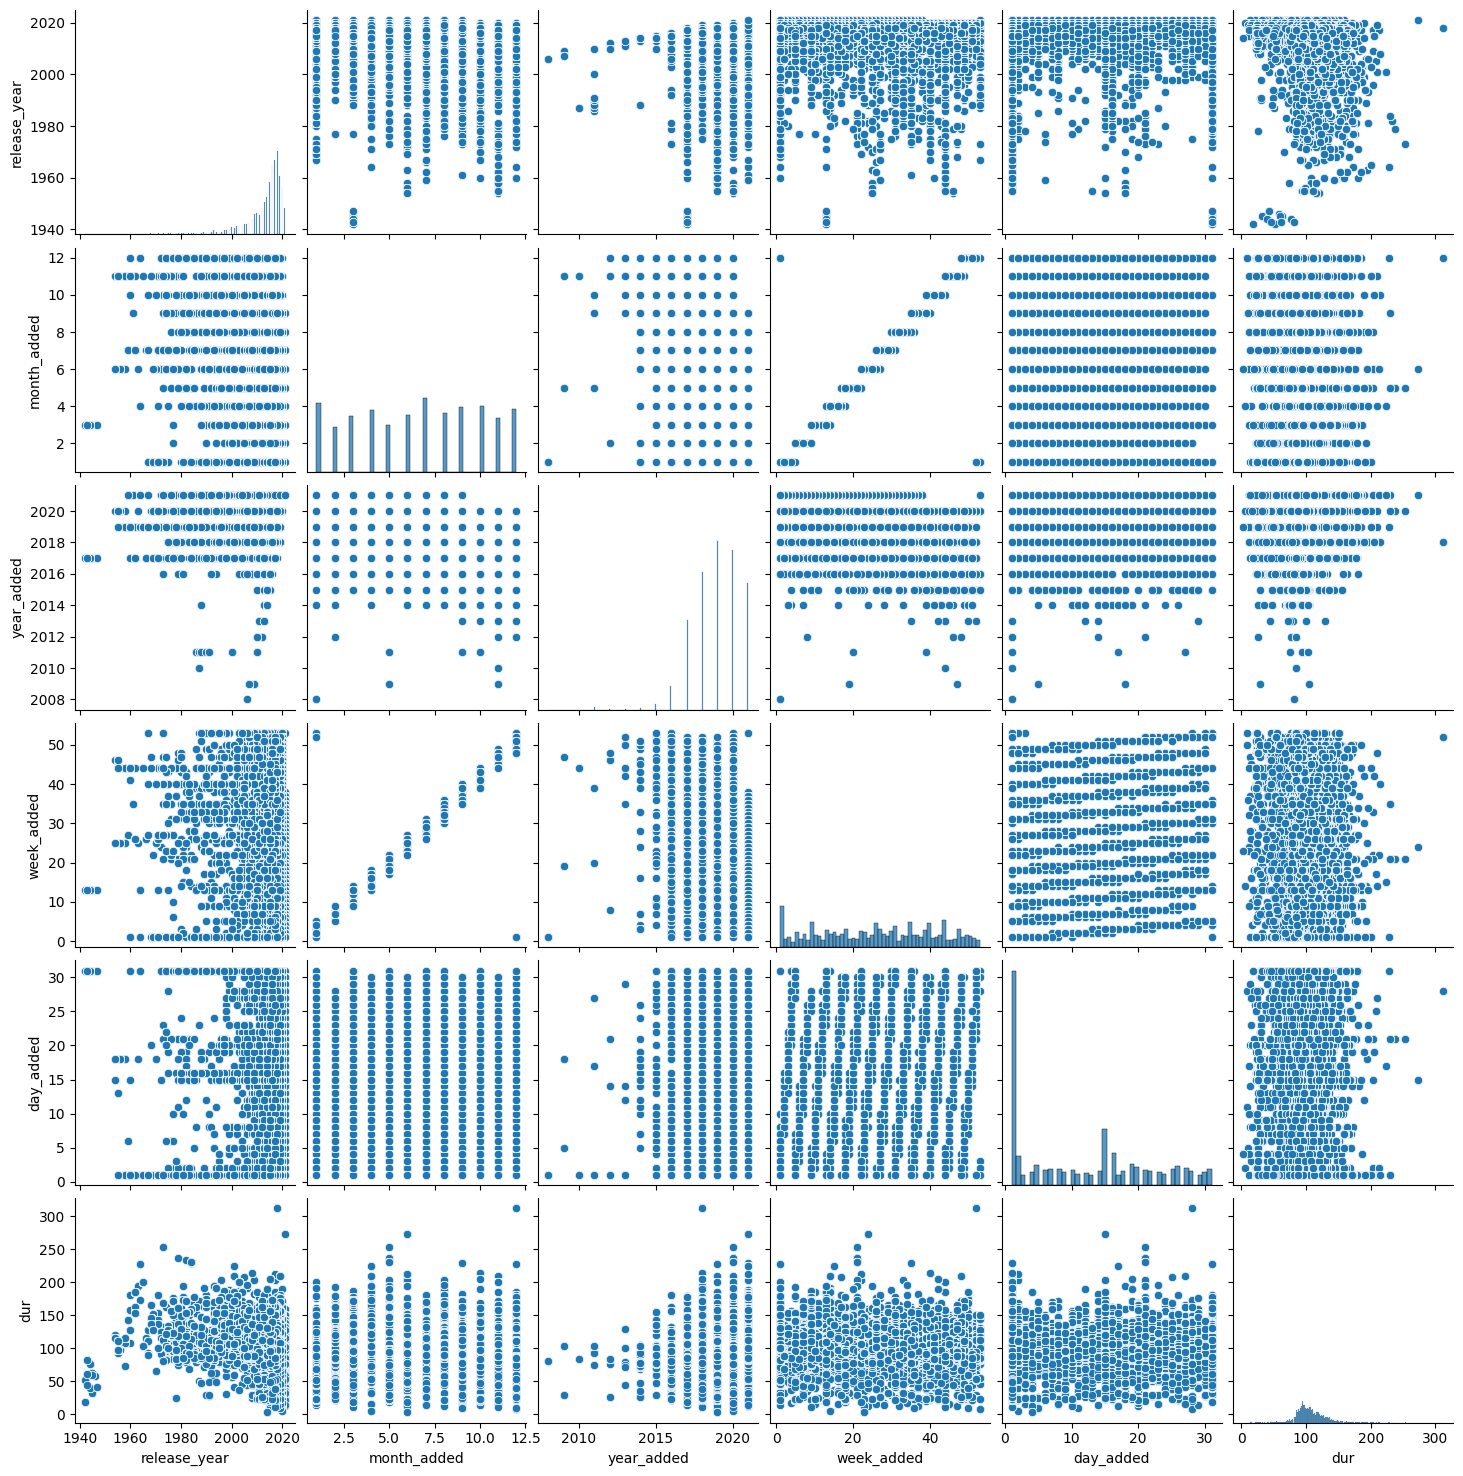

In [ ]:
sns.pairplot(data=Movies)

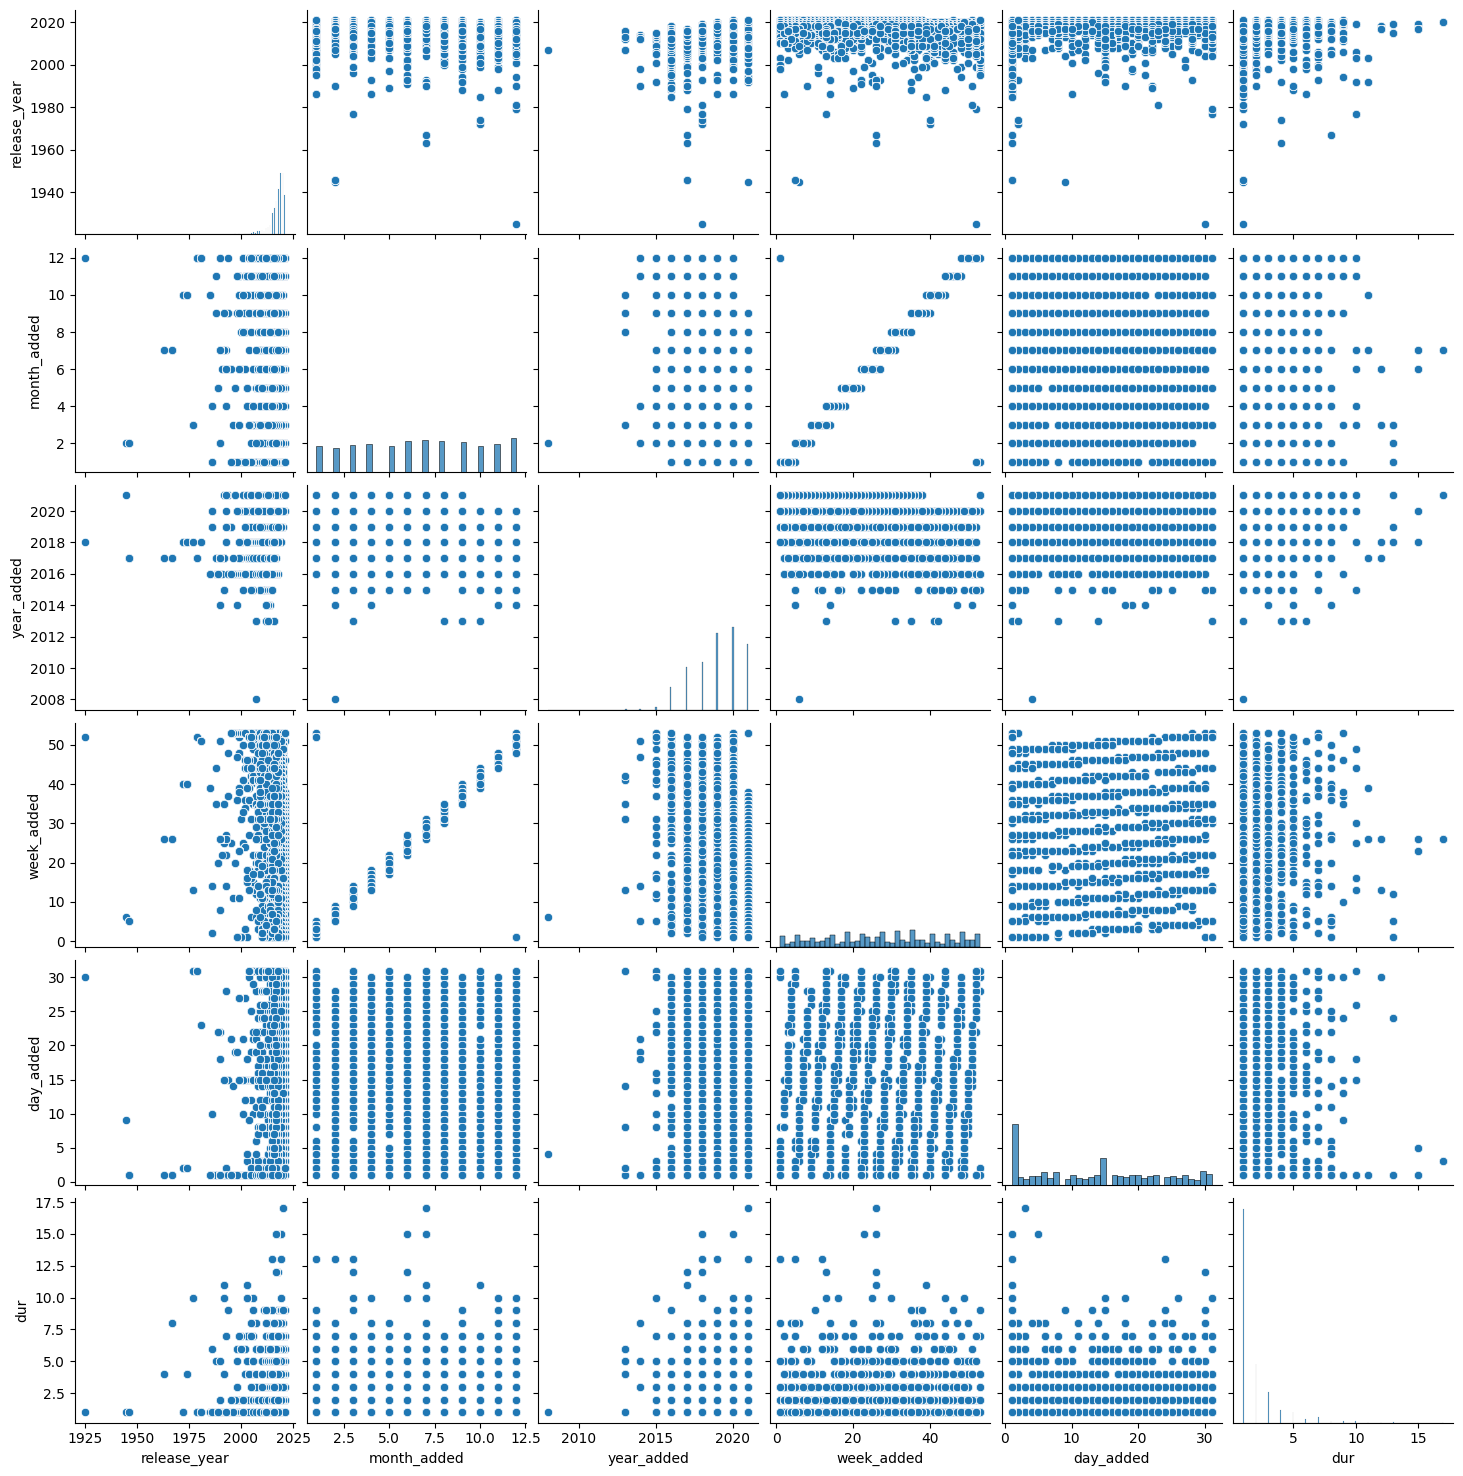

In [ ]:
sns.pairplot(data=TV_Show)

# Heat Map Analysis On Movies:

In [ ]:
movies_df = Movies.select_dtypes(include=['number'])

movies_df.corr()

release_year  month_added  year_added  week_added  day_added  \
release_year      1.000000    -0.044143   -0.024627    0.005107   0.178679   
month_added      -0.044143     1.000000   -0.170080    0.878249   0.031945   
year_added       -0.024627    -0.170080    1.000000   -0.143106   0.007549   
week_added        0.005107     0.878249   -0.143106    1.000000   0.010611   
day_added         0.178679     0.031945    0.007549    0.010611   1.000000   
dur              -0.235827     0.021431    0.073323   -0.026675  -0.050829   

                   dur  
release_year -0.235827  
month_added   0.021431  
year_added    0.073323  
week_added   -0.026675  
day_added    -0.050829  
dur           1.000000

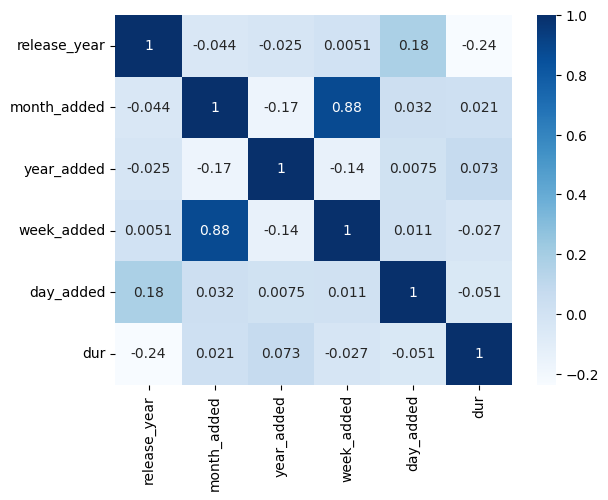

In [ ]:
sns.heatmap(movies_df.corr(), cmap= "Blues", annot=True)
plt.show()

In [ ]:
TV_df = TV_Show.select_dtypes(include=['number'])

TV_df.corr()

release_year  month_added  year_added  week_added  day_added  \
release_year      1.000000     0.004544    0.441736   -0.111415   0.163047   
month_added       0.004544     1.000000   -0.156825    0.884684  -0.009216   
year_added        0.441736    -0.156825    1.000000   -0.220271   0.087579   
week_added       -0.111415     0.884684   -0.220271    1.000000  -0.011253   
day_added         0.163047    -0.009216    0.087579   -0.011253   1.000000   
dur              -0.066853    -0.019971    0.046804   -0.034976  -0.016420   

                   dur  
release_year -0.066853  
month_added  -0.019971  
year_added    0.046804  
week_added   -0.034976  
day_added    -0.016420  
dur           1.000000

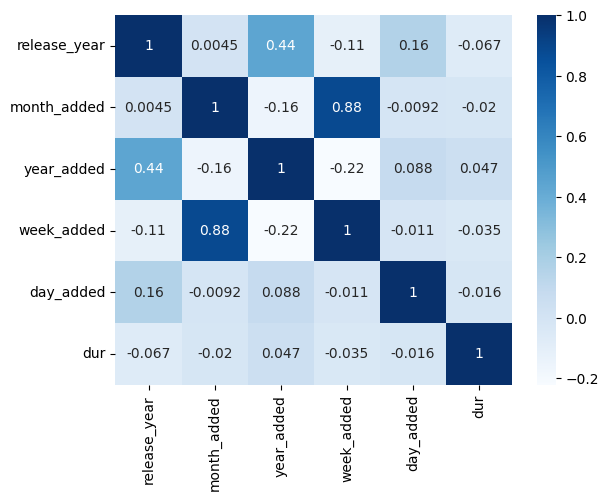

In [ ]:
sns.heatmap(TV_df.corr(),cmap= "Blues", annot=True)
plt.show()

# 6.Finding After how many days the movie will be added to Netflix after the release of the movie

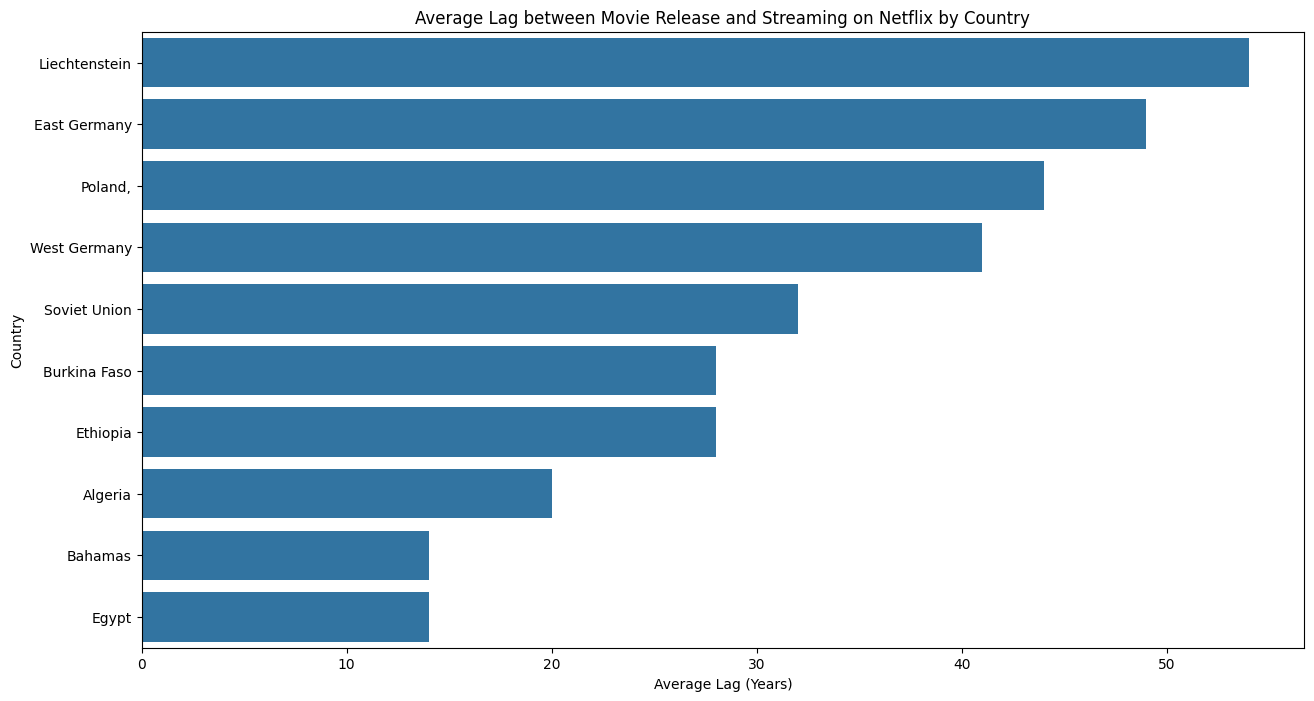

In [ ]:
Movies['diff'] = Movies['year_added'] - Movies['release_year']
Movies1 =Movies.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending=False)
Movies2=Movies1.head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x='diff', y='country', data=Movies2)
plt.title('Average Lag between Movie Release and Streaming on Netflix by Country')
plt.xlabel('Average Lag (Years)')
plt.ylabel('Country')
plt.show()

Few Observations:-

Acquiring Recent Content:

Audience Preference: Acquiring the most recent movies and TV shows can significantly increase audience viewership. This strategy addresses the audience’s preference for up-to-date content.


Mean Lag Difference: There is a notable mean lag difference in the top 10 most produced countries, indicating a demand for newer content from these regions.

Content Creation Strategy:

Popular Actors/Directors: When creating content, consider featuring popular actors and directors from each country. This can enhance the appeal and viewership of the content.


Director-Actor Combinations: Highly recommended director-actor combinations should be taken into account, as these pairings often have a proven track record of success and audience appeal.


Recommendations:-

Focus on Recent Releases:

Prioritize acquiring and promoting the most recent movies and TV shows to cater to the audience’s preference for current content. This approach can help bridge the lag difference observed in top-producing countries.

Leveraging Popular Talent:

Identify and collaborate with popular actors and directors from different countries. This can increase the content’s relevance and attractiveness to local audiences.

Pay special attention to successful director-actor combinations, as these pairings are likely to resonate well with viewers and enhance engagement.

By focusing on acquiring recent content and leveraging popular talent, Netflix can optimize its content strategy to meet audience demands and increase viewership across different regions


# Insights :

# a.	Content Addition Priorities:

1. Movies:

    Netflix prioritizes adding movies over TV shows.

2. Mature Content:

    A significant portion of movies are rated for audiences aged 14 and 17 and above.

3. Release Dates:

    Movies: Primarily released between 2008-2022.

    TV Shows: Primarily released between 2012-2022.

4. Geographical Production:

    The United States is the leading producer of both movies and TV shows.

5. International Content:

    International movies and dramas are prevalent.

    International TV shows and dramas dominate the TV show selection.

6. Preferred Release Times:

    Movies: Added mostly in July and on Fridays.

    TV Shows: Added mostly in December and on Fridays.
    
#b.	Movie Durations:

  About half of the movies have durations ranging from 90 to 110 minutes.

  There is a trend of decreasing movie durations over time.

Recommendations:

1.	Focus on Movies:

    Prioritize acquiring and promoting movies to optimize audience engagement due to their higher release frequency compared to TV shows.

2.	Adult-Oriented Content:

    With a considerable portion of adult-rated movies targeting audiences aged 14 and 17 and above, strategically focus on curating and highlighting adult-oriented content to appeal to the target demographic.

3.	International Content Investment:

    Continue investing in sourcing international movies and dramas to align with the platform’s popularity among diverse global audiences.

4.	Preferred Movie Durations:

    Prioritize acquiring and promoting movies with durations between 90 to 110 minutes, reflecting user preference for shorter film formats.

5.	Strategic Release Scheduling:

    Schedule new movie releases primarily in July, particularly on Fridays, to maximize viewership and capitalize on peak engagement periods.

    Focus on adding new TV shows in December, particularly on Fridays, to enhance viewership and capitalize on heightened user activity during the holiday season.


